In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [9]:
## df=df.sort_index()

In [10]:
# df.head()

In [11]:
# df.set_index('Date', inplace=True)

In [12]:
#df.head()

In [13]:
atr=df[df['Store']==733]

In [14]:
atr

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
732,733,5,2015-07-31,16625,3644,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
5192,733,1,2015-07-27,15907,3282,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012367,733,6,2013-01-05,10674,2694,1,0,0,0
1013482,733,5,2013-01-04,12078,3042,1,0,0,1
1014597,733,4,2013-01-03,12639,2978,1,0,0,1
1015712,733,3,2013-01-02,12477,3121,1,0,0,1


In [15]:
atr.Sales.value_counts()

15907    3
13070    3
16396    3
15563    3
15383    3
        ..
15415    1
15236    1
15423    1
15303    1
10765    1
Name: Sales, Length: 867, dtype: int64

In [16]:
atr

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
732,733,5,2015-07-31,16625,3644,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
5192,733,1,2015-07-27,15907,3282,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012367,733,6,2013-01-05,10674,2694,1,0,0,0
1013482,733,5,2013-01-04,12078,3042,1,0,0,1
1014597,733,4,2013-01-03,12639,2978,1,0,0,1
1015712,733,3,2013-01-02,12477,3121,1,0,0,1


In [17]:
atr=atr.sort_index()

In [18]:
atr

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
732,733,5,2015-07-31,16625,3644,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
5192,733,1,2015-07-27,15907,3282,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012367,733,6,2013-01-05,10674,2694,1,0,0,0
1013482,733,5,2013-01-04,12078,3042,1,0,0,1
1014597,733,4,2013-01-03,12639,2978,1,0,0,1
1015712,733,3,2013-01-02,12477,3121,1,0,0,1


In [19]:
atr=atr.set_index('Date')

In [20]:
atr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1
2015-07-30,733,4,14531,3145,1,1,0,1
2015-07-29,733,3,14145,3184,1,1,0,1
2015-07-28,733,2,14433,3148,1,1,0,1
2015-07-27,733,1,15907,3282,1,1,0,1


In [21]:
atr.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-05,733,6,10674,2694,1,0,0,0
2013-01-04,733,5,12078,3042,1,0,0,1
2013-01-03,733,4,12639,2978,1,0,0,1
2013-01-02,733,3,12477,3121,1,0,0,1
2013-01-01,733,2,10765,2377,1,0,a,1


In [22]:
data=atr.copy()

In [23]:
data1=atr.copy()

In [24]:
data1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1
2015-07-30,733,4,14531,3145,1,1,0,1
2015-07-29,733,3,14145,3184,1,1,0,1
2015-07-28,733,2,14433,3148,1,1,0,1
2015-07-27,733,1,15907,3282,1,1,0,1


In [25]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1
2015-07-30,733,4,14531,3145,1,1,0,1
2015-07-29,733,3,14145,3184,1,1,0,1
2015-07-28,733,2,14433,3148,1,1,0,1
2015-07-27,733,1,15907,3282,1,1,0,1


Text(0, 0.5, 'Daily Sales of store 682')

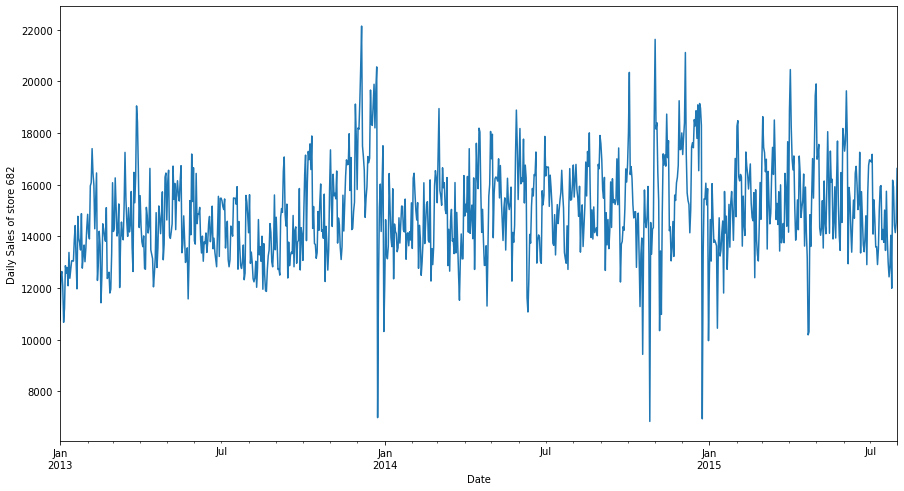

In [26]:
plt.figure(figsize=(15,8))
data['Sales'].plot()
plt.ylabel('Daily Sales of store 682')

In [27]:
data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [28]:
data=data.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'], axis=1)

In [29]:
data

,Sales
Date,
2015-07-31,16625
2015-07-30,14531
2015-07-29,14145
2015-07-28,14433
2015-07-27,15907
...,...
2013-01-05,10674
2013-01-04,12078
2013-01-03,12639


In [30]:
atr.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [31]:
atr.Sales.describe()

count      942.000000
mean     14933.288747
std       1838.044097
min       6838.000000
25%      13698.500000
50%      14795.500000
75%      16092.000000
max      22137.000000
Name: Sales, dtype: float64

In [32]:
data2=data['Sales']
data2.head()

Date
2015-07-31    16625
2015-07-30    14531
2015-07-29    14145
2015-07-28    14433
2015-07-27    15907
Name: Sales, dtype: int64

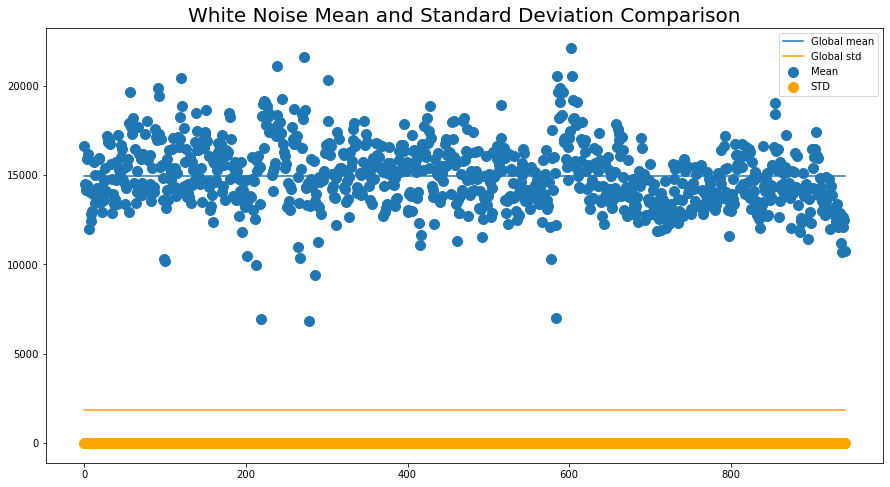

In [33]:
# Split into an arbitraty number of chunks
white_noise_chunks = data2
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.figure(figsize=(15,8))
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [data2.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [data2.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

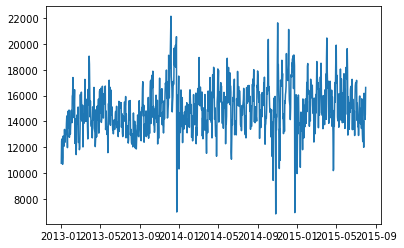

In [34]:
plt.plot(data2)

***Resampling data on weekly basis***

In [35]:
data2.resample('W').sum()

Date
2013-01-06     69859
2013-01-13     88808
2013-01-20     92486
2013-01-27     96825
2013-02-03     97405
               ...  
2015-07-05    114176
2015-07-12     99211
2015-07-19    102095
2015-07-26     94383
2015-08-02     75641
Freq: W-SUN, Name: Sales, Length: 135, dtype: int64

<AxesSubplot:xlabel='Date'>

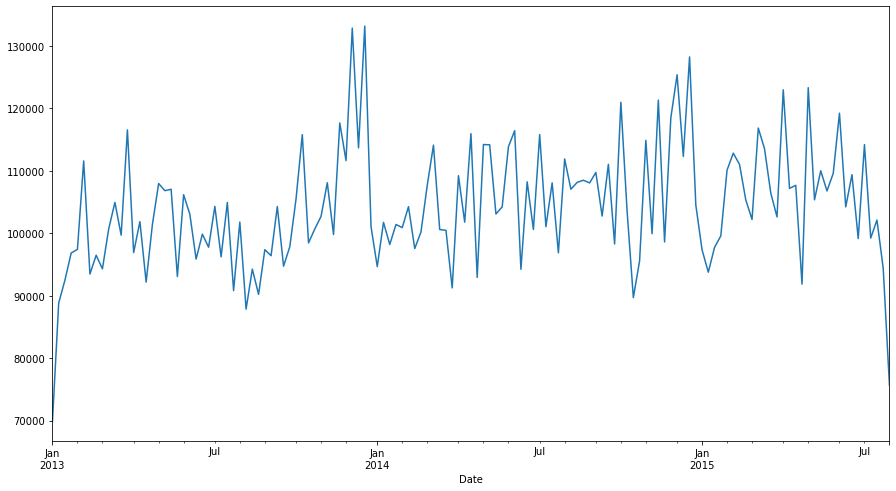

In [36]:
plt.figure(figsize=(15,8))
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

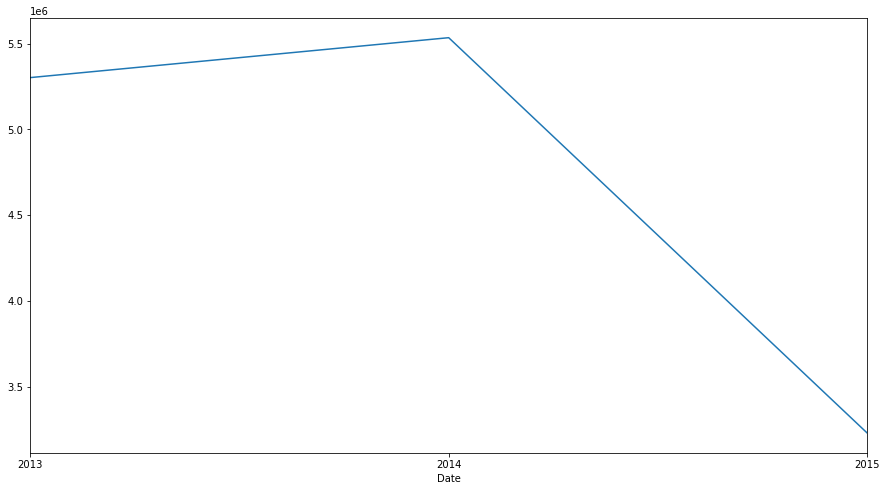

In [37]:
plt.figure(figsize=(15,8))
data2.resample('Y').sum().plot()  

<AxesSubplot:xlabel='Date'>

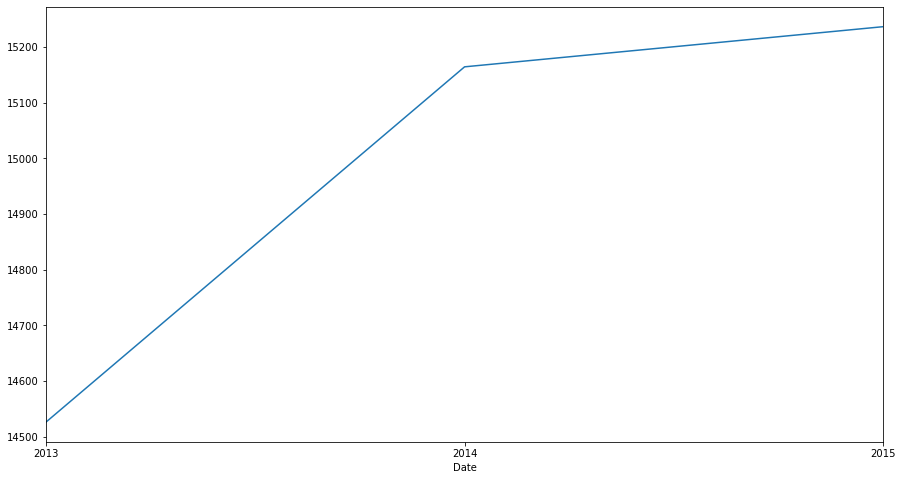

In [38]:
plt.figure(figsize=(15,8))
data2.resample('Y').mean().plot()

In [39]:
data2.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [40]:
data2.index.dayofweek

Int64Index([4, 3, 2, 1, 0, 6, 5, 4, 3, 2,
            ...
            3, 2, 1, 0, 6, 5, 4, 3, 2, 1],
           dtype='int64', name='Date', length=942)

In [41]:
data1.groupby(data2.index.dayofweek)['Sales'].mean()

Date
0    15542.223881
1    14562.222222
2    14487.629630
3    14814.748148
4    15966.444444
5    14015.283582
6    15143.738806
Name: Sales, dtype: float64

In [42]:
weekday=data1.groupby(data2.index.dayofweek)['Sales'].mean()
weekday

Date
0    15542.223881
1    14562.222222
2    14487.629630
3    14814.748148
4    15966.444444
5    14015.283582
6    15143.738806
Name: Sales, dtype: float64

In [43]:
weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

In [44]:
weekday

Mon     15542.223881
Tue     14562.222222
Wed     14487.629630
Thur    14814.748148
Fri     15966.444444
Sat     14015.283582
Sun     15143.738806
Name: Sales, dtype: float64

<AxesSubplot:>

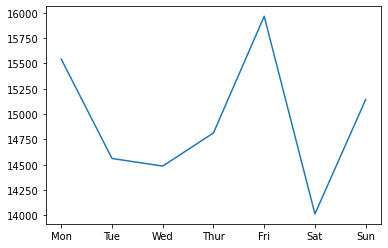

In [45]:
weekday.plot()

In [46]:
data2.index.dayofyear   

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [47]:
days=data2.index.dayofyear 
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [48]:
data1.groupby(days)['Sales'].mean()

Date
1      11818.000000
2      13923.666667
3      12994.000000
4      13750.000000
5      13030.666667
           ...     
361    15727.500000
362    15123.500000
363    15597.000000
364    16676.500000
365    10140.000000
Name: Sales, Length: 365, dtype: float64

Text(0, 0.5, 'Avg sales')

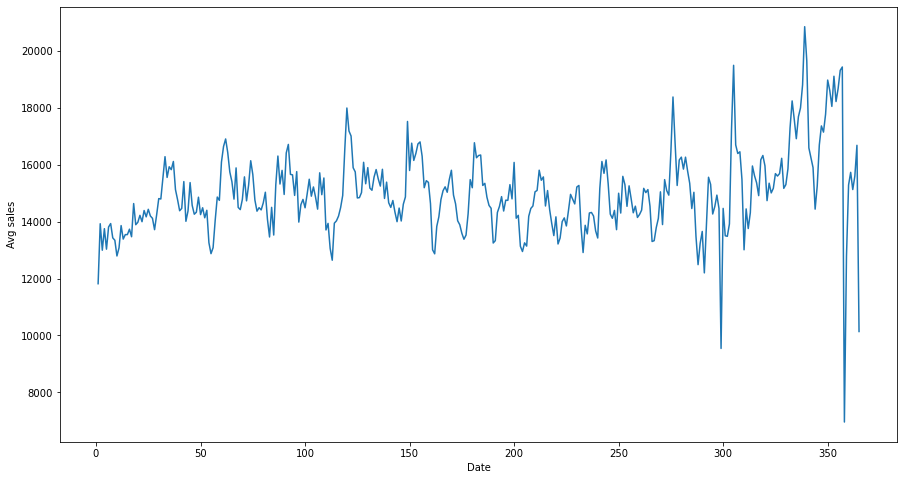

In [49]:
plt.figure(figsize=(15,8))
data1.groupby(days)['Sales'].mean().plot()
plt.ylabel('Avg sales')

In [50]:
data2.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=942)

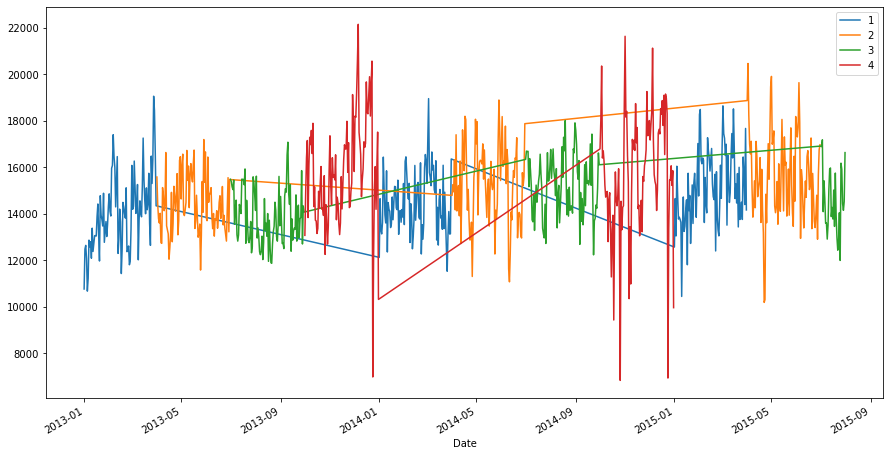

In [51]:
plt.figure(figsize=(15,8))
data.groupby(data2.index.quarter)['Sales'].plot()
plt.legend()

In [52]:
#  trend of Sales on weekdays vs weekends 

In [53]:
data1['dayofweek']=data1.index.dayofweek

In [54]:
data1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,dayofweek
Date,,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1,4
2015-07-30,733,4,14531,3145,1,1,0,1,3
2015-07-29,733,3,14145,3184,1,1,0,1,2
2015-07-28,733,2,14433,3148,1,1,0,1,1
2015-07-27,733,1,15907,3282,1,1,0,1,0


In [55]:
def assign_label(features):
    if features<5:
        return 'weekday'
    else:
        return 'weekend'

In [56]:
data1['dayofweek']=data1['dayofweek'].apply(assign_label)

In [57]:
data1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,dayofweek
Date,,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1,weekday
2015-07-30,733,4,14531,3145,1,1,0,1,weekday
2015-07-29,733,3,14145,3184,1,1,0,1,weekday
2015-07-28,733,2,14433,3148,1,1,0,1,weekday
2015-07-27,733,1,15907,3282,1,1,0,1,weekday


<AxesSubplot:title={'center':'Weekend Sales'}, xlabel='Date'>

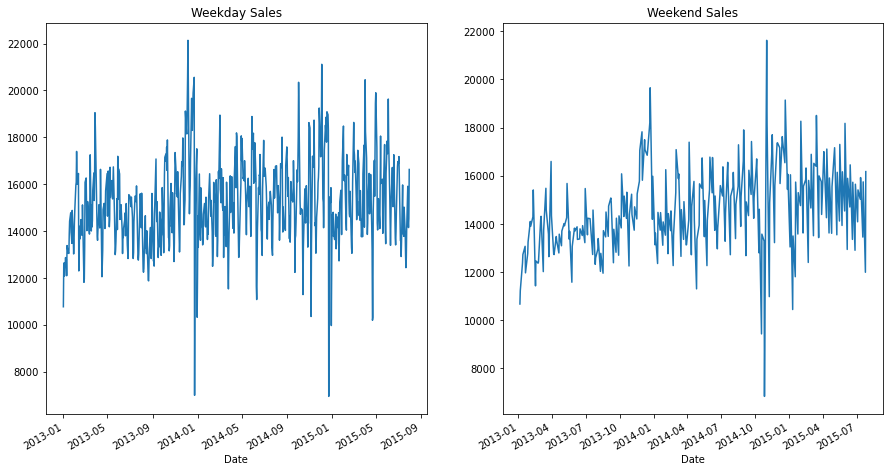

In [58]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
data1[data1['dayofweek']=='weekday']['Sales'].plot(ax=ax[0], title='Weekday Sales')
data1[data1['dayofweek']=='weekend']['Sales'].plot(ax=ax[1], title='Weekend Sales')

***naive model***

In [59]:
data1['Sales'].shift(1)

Date
2015-07-31        NaN
2015-07-30    16625.0
2015-07-29    14531.0
2015-07-28    14145.0
2015-07-27    14433.0
               ...   
2013-01-05    11226.0
2013-01-04    10674.0
2013-01-03    12078.0
2013-01-02    12639.0
2013-01-01    12477.0
Name: Sales, Length: 942, dtype: float64

In [60]:
data1['prediction_naive']=data1['Sales'].shift(1)

In [61]:
data1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,dayofweek,prediction_naive
Date,,,,,,,,,,
2015-07-31,733,5,16625,3644,1,1,0,1,weekday,NaN
2015-07-30,733,4,14531,3145,1,1,0,1,weekday,16625.0
2015-07-29,733,3,14145,3184,1,1,0,1,weekday,14531.0
2015-07-28,733,2,14433,3148,1,1,0,1,weekday,14145.0
2015-07-27,733,1,15907,3282,1,1,0,1,weekday,14433.0


<AxesSubplot:xlabel='Date'>

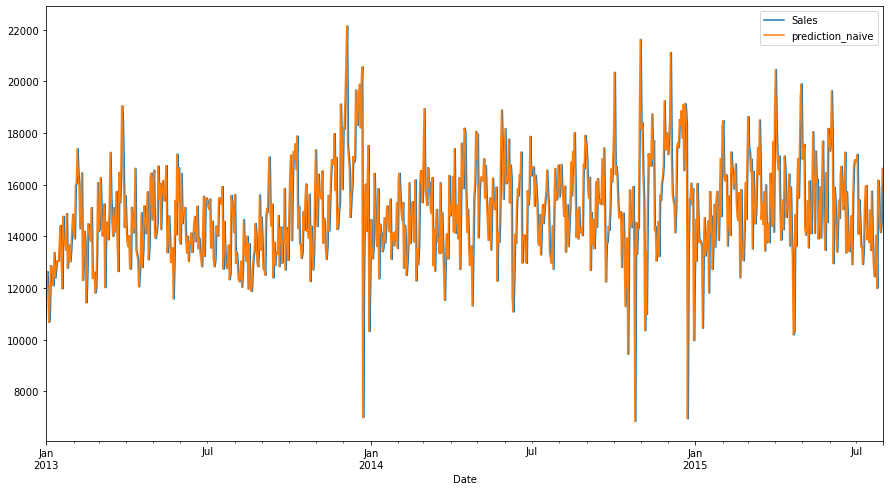

In [62]:
data1[['Sales','prediction_naive']].plot(figsize=(15,8))

In [63]:
# No much change , predicted vs actual are overlapping

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
rmse=np.sqrt(mean_squared_error(data1['Sales'][1:], data1['prediction_naive'][1:]))
rmse

1743.00862808451

<AxesSubplot:xlabel='Date'>

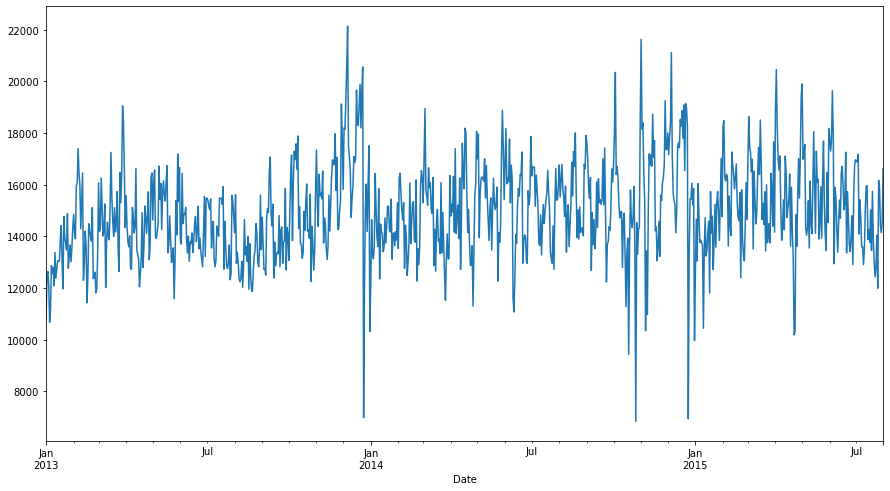

In [66]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

In [67]:
mean=data1['Sales'].rolling(window=7).mean()
std=data1['Sales'].rolling(window=7).std()

In [68]:
mean

Date
2015-07-31             NaN
2015-07-30             NaN
2015-07-29             NaN
2015-07-28             NaN
2015-07-27             NaN
                  ...     
2013-01-05    12228.857143
2013-01-04    12043.142857
2013-01-03    12121.857143
2013-01-02    12076.571429
2013-01-01    11817.714286
Name: Sales, Length: 942, dtype: float64

In [69]:
std

Date
2015-07-31           NaN
2015-07-30           NaN
2015-07-29           NaN
2015-07-28           NaN
2015-07-27           NaN
                 ...    
2013-01-05    966.862698
2013-01-04    823.583719
2013-01-03    854.342131
2013-01-02    820.507741
2013-01-01    916.527816
Name: Sales, Length: 942, dtype: float64

In [70]:
mean.head(20)

Date
2015-07-31             NaN
2015-07-30             NaN
2015-07-29             NaN
2015-07-28             NaN
2015-07-27             NaN
2015-07-26             NaN
2015-07-25    14829.285714
2015-07-24    14460.285714
2015-07-23    14218.285714
2015-07-22    13973.714286
2015-07-21    13765.857143
2015-07-20    13483.285714
2015-07-19    13422.428571
2015-07-18    13631.285714
2015-07-17    13770.428571
2015-07-16    13904.000000
2015-07-15    14166.285714
2015-07-14    14294.285714
2015-07-13    14585.000000
2015-07-12    14610.428571
Name: Sales, dtype: float64

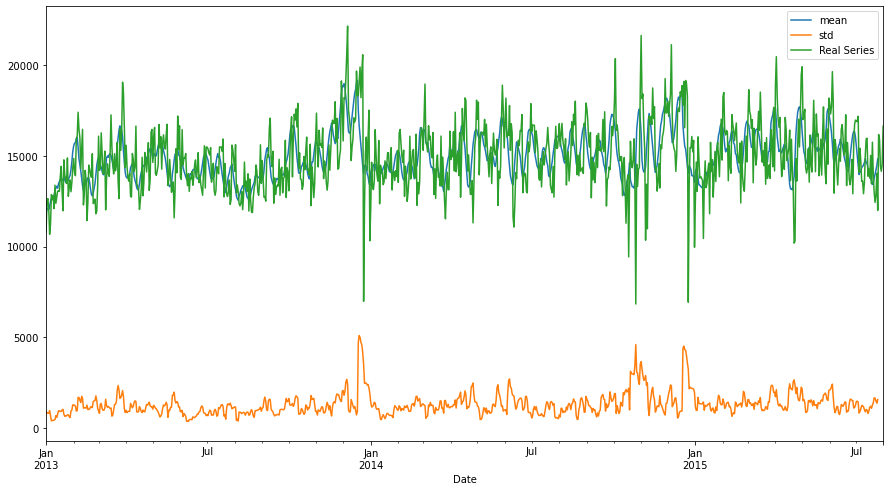

In [71]:
plt.figure(figsize=(15,8))
mean.plot(label='mean')
std.plot(label='std')
data1['Sales'].plot(label='Real Series')
plt.legend()
plt.show()

In [72]:
data1['Sales'].isnull().sum()

0

rolling mean is not stationary and varies with time, have to eliminate trend and seasonality

#### Augmented Dicky fullers test

In [73]:
# H0: series is non stationary
# H1: serires is stationary 
# threshold: 0.5

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
adfuller(data1['Sales'])

(-4.724691378477039,
 7.560996294159769e-05,
 21,
 920,
 {'1%': -3.4374778690219956,
  '5%': -2.864686684217556,
  '10%': -2.5684454926748583},
 15847.676504968427)

In [76]:
result=adfuller(data1['Sales'])
labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

for value,label in zip(result,labels):
    print("{} : {}".format(label,value))
    

ADf Test Statics : -4.724691378477039
p-value : 7.560996294159769e-05
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}


In [77]:
def test_for_stationarity(feature):
    mean=data1[feature].rolling(window=7).mean()
    std=data1[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,8))
    mean.plot(label='mean')
    std.plot(label='std')
    data1[feature].plot(label='Real Series')
    plt.legend()
    plt.show()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

    for value,label in zip(result,labels):
        print("{} : {}".format(label,value))
    
    
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary')
    else:
        print('Weak evidence against the null hypothesis i.e we are accepting the null hypothesis and we can state that our data is non-Stationary')
     

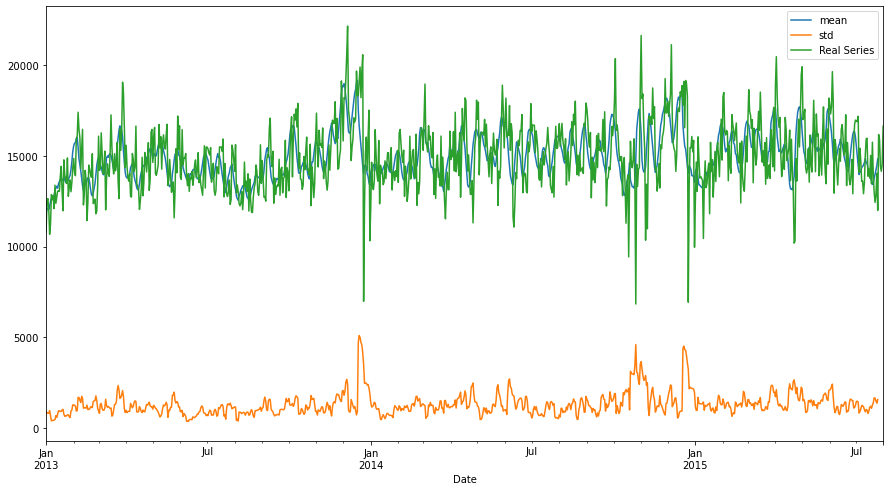

ADf Test Statics : -4.724691378477039
p-value : 7.560996294159769e-05
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}
Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary


In [78]:
test_for_stationarity('Sales')

<AxesSubplot:xlabel='Date'>

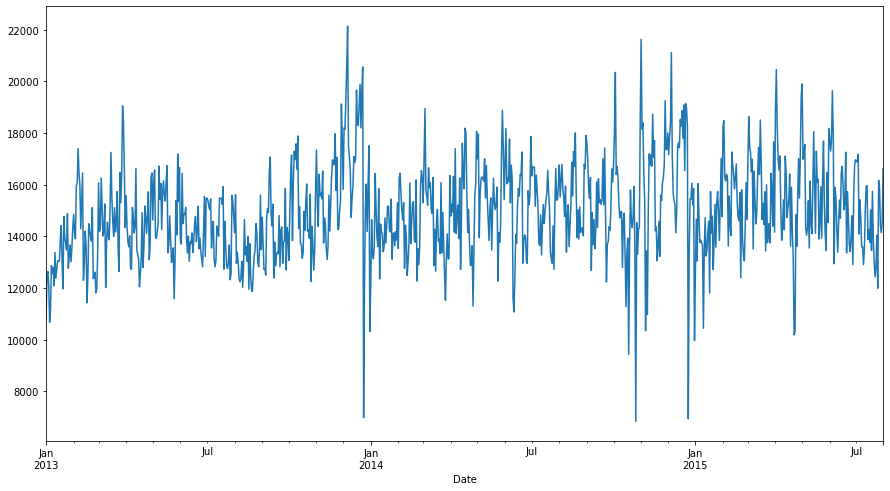

In [79]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

<AxesSubplot:xlabel='Date'>

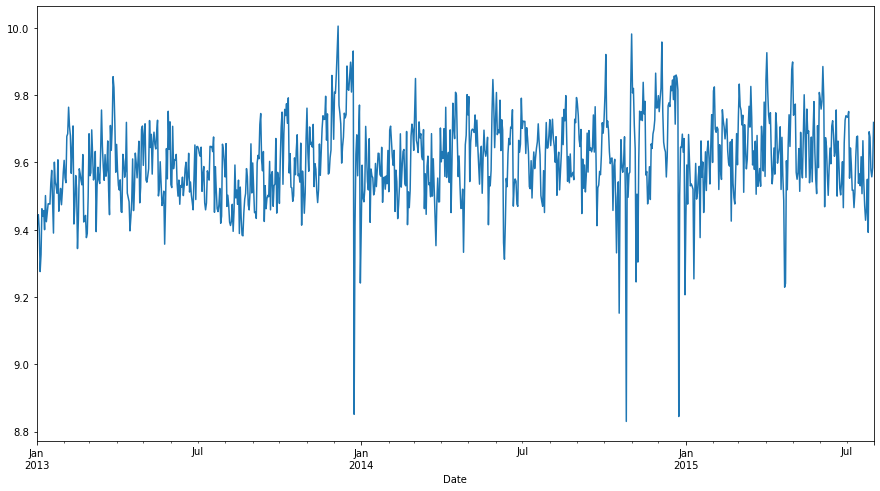

In [80]:
plt.figure(figsize=(15,8))
np.log(data1['Sales']).plot()

In [81]:
log_data=np.log(data1['Sales'])
log_data

Date
2015-07-31    9.718663
2015-07-30    9.584040
2015-07-29    9.557116
2015-07-28    9.577273
2015-07-27    9.674515
                ...   
2013-01-05    9.275566
2013-01-04    9.399141
2013-01-03    9.444543
2013-01-02    9.431642
2013-01-01    9.284055
Name: Sales, Length: 942, dtype: float64

In [82]:
rolling_avg=log_data-log_data.shift(7)
rolling_avg

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.148110
2013-01-04   -0.102226
2013-01-03    0.044574
2013-01-02   -0.025089
2013-01-01   -0.155570
Name: Sales, Length: 942, dtype: float64

In [83]:
Rolling_average=log_data.rolling(window=7).mean()

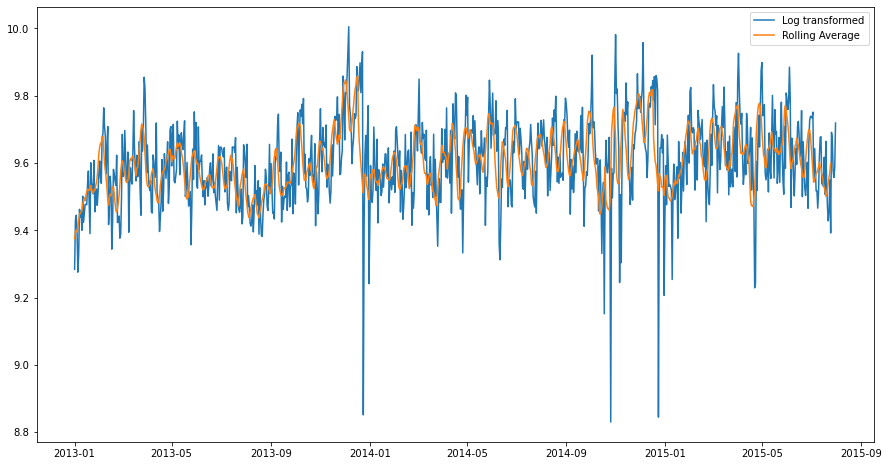

In [84]:
plt.figure(figsize=(15,8))
plt.plot(log_data, label='Log transformed')
plt.plot(Rolling_average, label='Rolling Average')
plt.legend()

In [85]:
lr_diff=log_data-Rolling_average

In [86]:
lr_diff

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.133221
2013-01-04    0.004957
2013-01-03    0.043991
2013-01-02    0.034675
2013-01-01   -0.090688
Name: Sales, Length: 942, dtype: float64

In [87]:
data1['lr_diff']=lr_diff

In [88]:
log_ts=log_data-log_data.shift(7)
log_ts

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.148110
2013-01-04   -0.102226
2013-01-03    0.044574
2013-01-02   -0.025089
2013-01-01   -0.155570
Name: Sales, Length: 942, dtype: float64

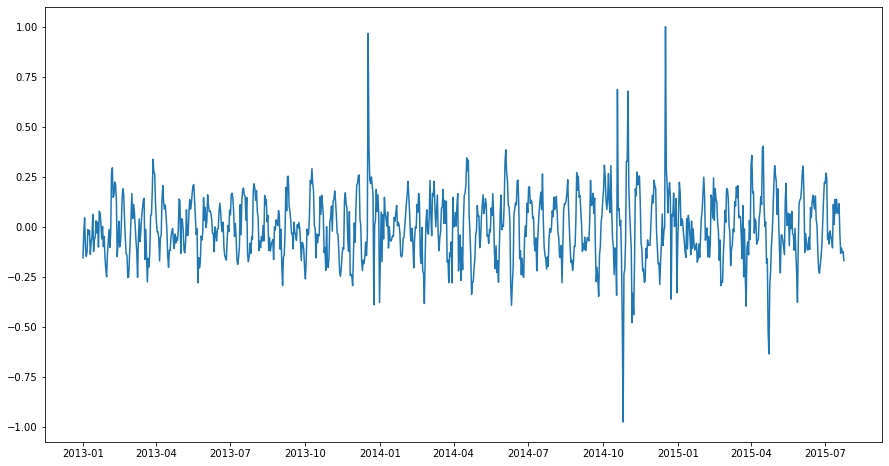

In [89]:
plt.figure(figsize=(15,8))
plt.plot(log_ts)

In [90]:
# With respect to seasonality this is my trend

In [91]:
data1['log_ts']=log_ts

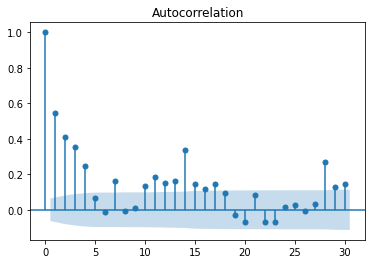

In [92]:
plot_acf(data1['Sales']);

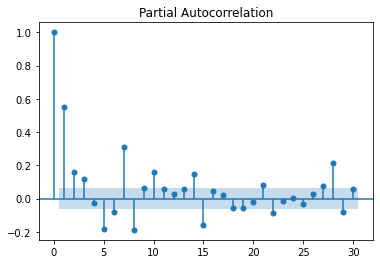

In [93]:
plot_pacf(data1['Sales']);

In [94]:
df2_decompose= seasonal_decompose(data['Sales'], model='additive')

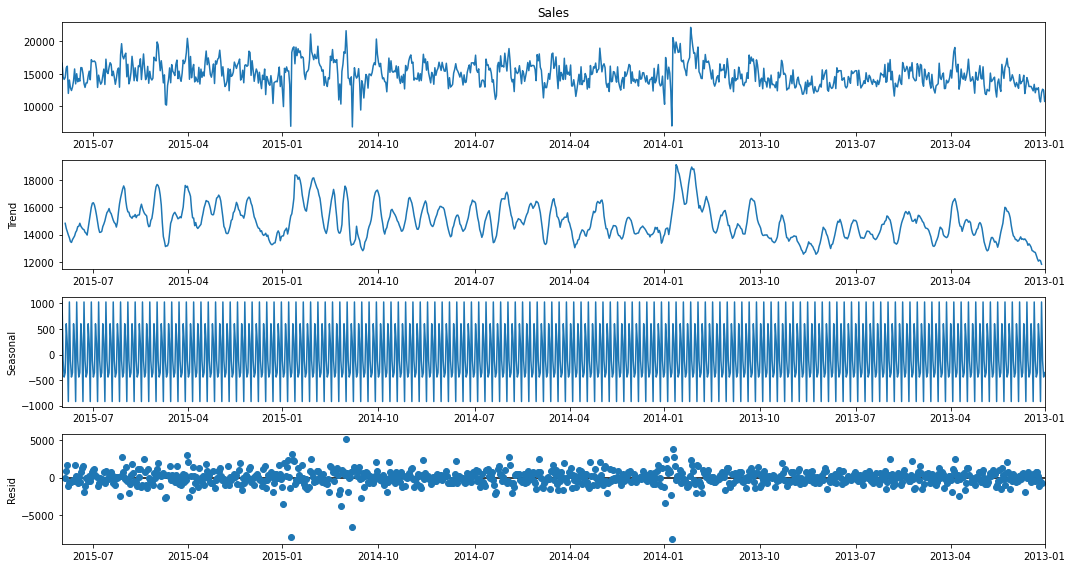

In [95]:
plt.rcParams['figure.figsize']=[15,8]
df2_decompose.plot();
plt.show()

Text(0.5, 0, 'Days')

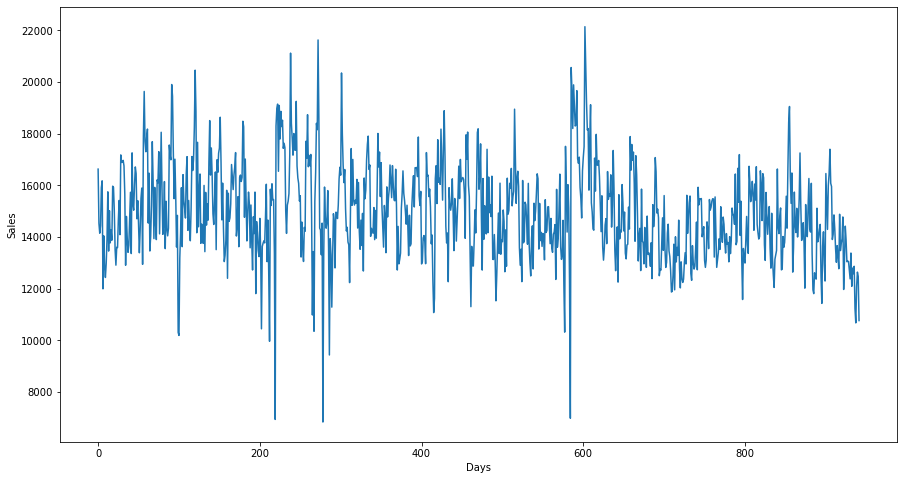

In [96]:
x=list(range(len(data2.index)))
y=data.Sales

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

In [97]:
## Let's apply fourier transform

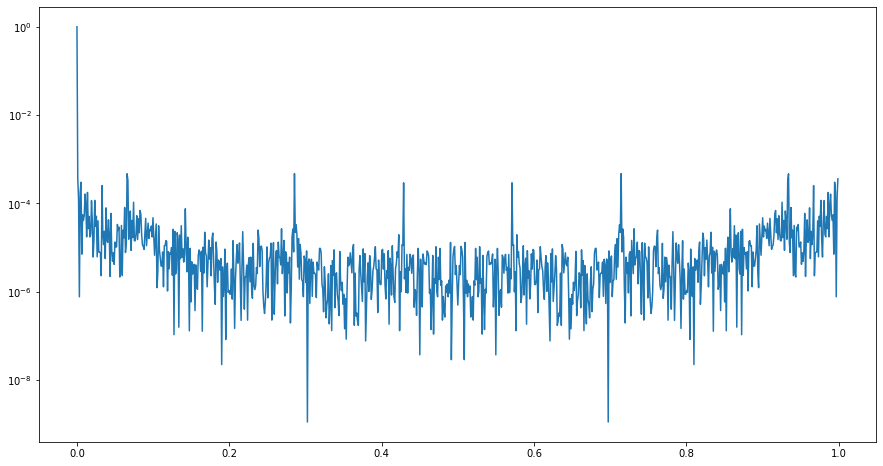

In [98]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

In [99]:
# Fourier transform with X-axix in days (also adding time period)

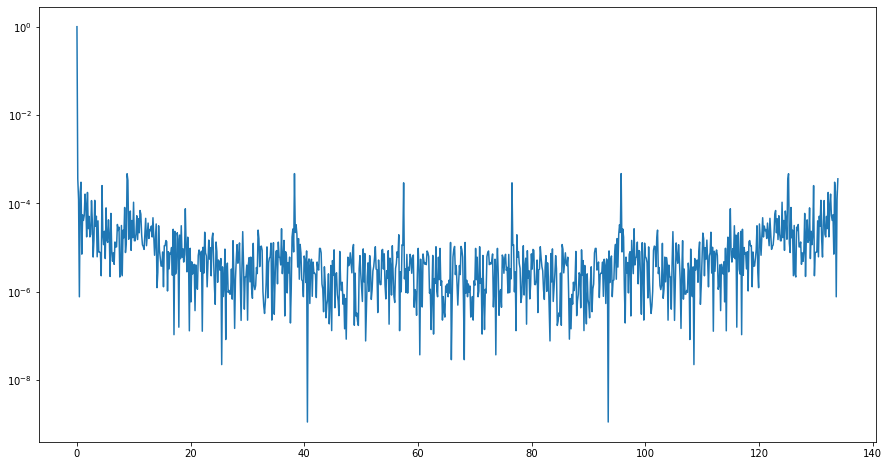

In [100]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/134)
plt.semilogy(results['period'], results['nspectrum'])

In [101]:
# Let's regroup the sales data to make the plot smoother

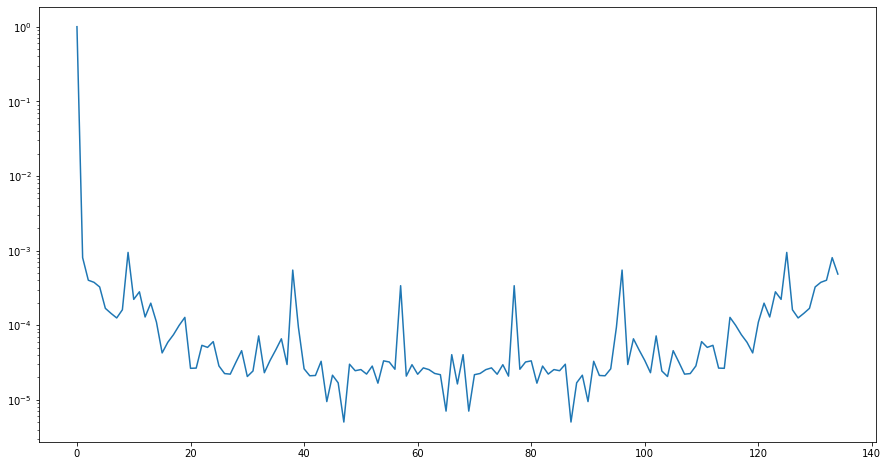

In [102]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [104]:
data=data.reindex(index=data.index[::-1])

In [105]:
data

,Sales
Date,
2013-01-01,10765
2013-01-02,12477
2013-01-03,12639
2013-01-04,12078
2013-01-05,10674
...,...
2015-07-27,15907
2015-07-28,14433
2015-07-29,14145


In [106]:
dataa=data.copy()

In [107]:
dataa

,Sales
Date,
2013-01-01,10765
2013-01-02,12477
2013-01-03,12639
2013-01-04,12078
2013-01-05,10674
...,...
2015-07-27,15907
2015-07-28,14433
2015-07-29,14145


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
dataa['Sales']=scaler.fit_transform(np.array(dataa['Sales']).reshape(-1,1))

In [109]:
train_end=datetime(2015,1,31)
test_end=datetime(2015,7,31)

In [110]:
dataa

,Sales
Date,
2013-01-01,0.331015
2013-01-02,0.431728
2013-01-03,0.441258
2013-01-04,0.408255
2013-01-05,0.325662
...,...
2015-07-27,0.633505
2015-07-28,0.546794
2015-07-29,0.529852


In [111]:
train=dataa[:train_end]
test=dataa[train_end+timedelta(days=1):test_end]

In [112]:
data.shape

(942, 1)

In [113]:
train.shape

(761, 1)

In [114]:
test.shape

(181, 1)

***AR Model***

In [115]:
model_ar=ARMA(data['Sales'], order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar=model_ar.fit()

In [116]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(1, 0)   Log Likelihood               -8247.933
Method:                       css-mle   S.D. of innovations           1535.541
Date:                Mon, 21 Mar 2022   AIC                          16501.866
Time:                        21:43:48   BIC                          16516.410
Sample:                    01-01-2013   HQIC                         16507.410
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    111.062    134.419      0.000    1.47e+04    1.51e+04
ar.L1.Sales     0.5501      0.027     20.155      0.000       0.497       0.604
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8178           +0.0000j            1.8178            0.0000
-----------------------------------------------------------------------------
"""

In [117]:
model_ar_t=ARMA(train, order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_t=model_ar_t.fit()
result_ar_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(1, 0)   Log Likelihood                 750.543
Method:                       css-mle   S.D. of innovations              0.090
Date:                Mon, 21 Mar 2022   AIC                          -1495.086
Time:                        21:43:54   BIC                          -1481.182
Sample:                    01-01-2013   HQIC                         -1489.732
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5690      0.007     76.912      0.000       0.555       0.584
ar.L1.Sales     0.5586      0.030     18.529      0.000       0.500       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7901           +0.0000j            1.7901            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
model_ar_2=ARMA(data['Sales'], order=(2,0)) 
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(2, 0)   Log Likelihood               -8236.161
Method:                       css-mle   S.D. of innovations           1516.430
Date:                Mon, 21 Mar 2022   AIC                          16480.322
Time:                        21:44:00   BIC                          16499.714
Sample:                    01-01-2013   HQIC                         16487.714
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    130.171    114.680      0.000    1.47e+04    1.52e+04
ar.L1.Sales     0.4637      0.032     14.387      0.000       0.401       0.527
ar.L2.Sales     0.1575      0.032      4.883      0.000       0.094       0.221
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4461           +0.0000j            1.4461            0.0000
AR.2           -4.3904           +0.0000j            4.3904            0.5000
-----------------------------------------------------------------------------
"""

In [119]:
model_ar_2t=ARMA(train, order=(2,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_2t=model_ar_2t.fit()
result_ar_2t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(2, 0)   Log Likelihood                 759.561
Method:                       css-mle   S.D. of innovations              0.089
Date:                Mon, 21 Mar 2022   AIC                          -1511.122
Time:                        21:44:07   BIC                          -1492.584
Sample:                    01-01-2013   HQIC                         -1503.984
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5689      0.009     65.877      0.000       0.552       0.586
ar.L1.Sales     0.4732      0.036     13.190      0.000       0.403       0.544
ar.L2.Sales     0.1535      0.036      4.273      0.000       0.083       0.224
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4402           +0.0000j            1.4402            0.0000
AR.2           -4.5222           +0.0000j            4.5222            0.5000
-----------------------------------------------------------------------------
"""

In [120]:
model_ar_3=ARMA(data['Sales'], order=(3,0)) 
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(3, 0)   Log Likelihood               -8229.744
Method:                       css-mle   S.D. of innovations           1506.101
Date:                Mon, 21 Mar 2022   AIC                          16469.488
Time:                        21:44:10   BIC                          16493.728
Sample:                    01-01-2013   HQIC                         16478.727
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    146.344    101.994      0.000    1.46e+04    1.52e+04
ar.L1.Sales     0.4454      0.032     13.740      0.000       0.382       0.509
ar.L2.Sales     0.1037      0.035      2.933      0.003       0.034       0.173
ar.L3.Sales     0.1166      0.032      3.595      0.000       0.053       0.180
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2919           -0.0000j            1.2919           -0.0000
AR.2           -1.0908           -2.3344j            2.5766           -0.3196
AR.3           -1.0908           +2.3344j            2.5766            0.3196
-----------------------------------------------------------------------------
"""

In [121]:
model_ar_3t=ARMA(train, order=(3,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_3t=model_ar_3t.fit()
result_ar_3t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(3, 0)   Log Likelihood                 765.128
Method:                       css-mle   S.D. of innovations              0.089
Date:                Mon, 21 Mar 2022   AIC                          -1520.255
Time:                        21:44:16   BIC                          -1497.082
Sample:                    01-01-2013   HQIC                         -1511.332
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5687      0.010     58.331      0.000       0.550       0.588
ar.L1.Sales     0.4548      0.036     12.622      0.000       0.384       0.525
ar.L2.Sales     0.0966      0.040      2.443      0.015       0.019       0.174
ar.L3.Sales     0.1208      0.036      3.349      0.001       0.050       0.192
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2848           -0.0000j            1.2848           -0.0000
AR.2           -1.0420           -2.3143j            2.5380           -0.3173
AR.3           -1.0420           +2.3143j            2.5380            0.3173
-----------------------------------------------------------------------------
"""

In [122]:
model_ar_4=ARMA(data['Sales'], order=(4,0)) 
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(4, 0)   Log Likelihood               -8229.509
Method:                       css-mle   S.D. of innovations           1505.724
Date:                Mon, 21 Mar 2022   AIC                          16471.018
Time:                        21:44:22   BIC                          16500.106
Sample:                    01-01-2013   HQIC                         16482.105
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.492e+04    143.104    104.295      0.000    1.46e+04    1.52e+04
ar.L1.Sales     0.4480      0.033     13.731      0.000       0.384       0.512
ar.L2.Sales     0.1060      0.036      2.986      0.003       0.036       0.176
ar.L3.Sales     0.1265      0.035      3.564      0.000       0.057       0.196
ar.L4.Sales    -0.0224      0.033     -0.685      0.493      -0.086       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3207           -0.0000j            1.3207           -0.0000
AR.2           -1.1658           -1.9284j            2.2534           -0.3365
AR.3           -1.1658           +1.9284j            2.2534            0.3365
AR.4            6.6649           -0.0000j            6.6649           -0.0000
-----------------------------------------------------------------------------
"""

In [123]:
model_ar_4t=ARMA(train, order=(4,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_4t=model_ar_4t.fit()
result_ar_4t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(4, 0)   Log Likelihood                 765.146
Method:                       css-mle   S.D. of innovations              0.089
Date:                Mon, 21 Mar 2022   AIC                          -1518.292
Time:                        21:44:29   BIC                          -1490.484
Sample:                    01-01-2013   HQIC                         -1507.584
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5687      0.010     58.737      0.000       0.550       0.588
ar.L1.Sales     0.4557      0.036     12.556      0.000       0.385       0.527
ar.L2.Sales     0.0972      0.040      2.451      0.014       0.019       0.175
ar.L3.Sales     0.1240      0.040      3.127      0.002       0.046       0.202
ar.L4.Sales    -0.0069      0.036     -0.191      0.849      -0.078       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2927           -0.0000j            1.2927           -0.0000
AR.2           -1.1018           -2.1733j            2.4367           -0.3247
AR.3           -1.1018           +2.1733j            2.4367            0.3247
AR.4           18.7856           -0.0000j           18.7856           -0.0000
-----------------------------------------------------------------------------
"""

In [124]:
from scipy.stats.distributions import chi2

In [125]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [126]:
LLR_test(model_ar, model_ar_2)

0.0

In [127]:
LLR_test(model_ar_t, model_ar_2t)

0.0

In [128]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [129]:
LLR_test(model_ar_2t, model_ar_3t)

0.001

In [130]:
LLR_test(model_ar_3, model_ar_4)

0.493

In [131]:
LLR_test(model_ar_3t, model_ar_4t)

0.849

In [132]:
model_ar_5=ARMA(data['Sales'], order=(5,0)) 
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print(LLR_test(model_ar_4, model_ar_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(5, 0)   Log Likelihood               -8214.436
Method:                       css-mle   S.D. of innovations           1481.698
Date:                Mon, 21 Mar 2022   AIC                          16442.872
Time:                        21:45:12   BIC                          16476.808
Sample:                    01-01-2013   HQIC                         16455.807
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    119.269    125.184      0.000    1.47e+04    1.52e+04
ar.L1.Sales     0.4433      0.032     13.802      0.000       0.380       0.506
ar.L2.Sales     0.1285      0.035      3.653    

In [133]:
model_ar_5t=ARMA(train, order=(5,0)) 
result_ar_5t=model_ar_5t.fit()
print(result_ar_5t.summary())
print(LLR_test(model_ar_4t, model_ar_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(5, 0)   Log Likelihood                 777.140
Method:                       css-mle   S.D. of innovations              0.087
Date:                Mon, 21 Mar 2022   AIC                          -1540.281
Time:                        21:45:14   BIC                          -1507.838
Sample:                    01-01-2013   HQIC                         -1527.789
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5691      0.008     70.429      0.000       0.553       0.585
ar.L1.Sales     0.4538      0.036     12.707      0.000       0.384       0.524
ar.L2.Sales     0.1187      0.039      3.021    

In [134]:
model_ar_6=ARMA(data['Sales'], order=(6,0)) 
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print(LLR_test(model_ar_5, model_ar_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(6, 0)   Log Likelihood               -8211.701
Method:                       css-mle   S.D. of innovations           1477.375
Date:                Mon, 21 Mar 2022   AIC                          16439.402
Time:                        21:45:20   BIC                          16478.186
Sample:                    01-01-2013   HQIC                         16454.186
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    110.335    135.344      0.000    1.47e+04    1.51e+04
ar.L1.Sales     0.4294      0.033     13.188      0.000       0.366       0.493
ar.L2.Sales     0.1326      0.035      3.777    

In [135]:
model_ar_6t=ARMA(train, order=(6,0)) 
result_ar_6t=model_ar_6t.fit()
print(result_ar_6t.summary())
print(LLR_test(model_ar_5t, model_ar_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(6, 0)   Log Likelihood                 778.364
Method:                       css-mle   S.D. of innovations              0.087
Date:                Mon, 21 Mar 2022   AIC                          -1540.728
Time:                        21:45:24   BIC                          -1503.650
Sample:                    01-01-2013   HQIC                         -1526.451
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5692      0.008     74.645      0.000       0.554       0.584
ar.L1.Sales     0.4437      0.036     12.242      0.000       0.373       0.515
ar.L2.Sales     0.1227      0.039      3.121    

In [136]:
model_ar_7=ARMA(data['Sales'], order=(7,0)) 
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print(LLR_test(model_ar_6, model_ar_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(7, 0)   Log Likelihood               -8164.016
Method:                       css-mle   S.D. of innovations           1403.913
Date:                Mon, 21 Mar 2022   AIC                          16346.032
Time:                        21:45:36   BIC                          16389.664
Sample:                    01-01-2013   HQIC                         16362.663
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.492e+04    153.216     97.372      0.000    1.46e+04    1.52e+04
ar.L1.Sales     0.4521      0.031     14.579      0.000       0.391       0.513
ar.L2.Sales     0.1792      0.034      5.320    

In [137]:
model_ar_7t=ARMA(train, order=(7,0)) 
result_ar_7t=model_ar_7t.fit()
print(result_ar_7t.summary())
print(LLR_test(model_ar_6t, model_ar_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(7, 0)   Log Likelihood                 820.145
Method:                       css-mle   S.D. of innovations              0.082
Date:                Mon, 21 Mar 2022   AIC                          -1622.290
Time:                        21:45:40   BIC                          -1580.579
Sample:                    01-01-2013   HQIC                         -1606.229
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5684      0.011     52.897      0.000       0.547       0.590
ar.L1.Sales     0.4619      0.034     13.459      0.000       0.395       0.529
ar.L2.Sales     0.1723      0.038      4.590    

In [138]:
model_ar_8=ARMA(data['Sales'], order=(8,0)) 
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(8, 0)   Log Likelihood               -8147.226
Method:                       css-mle   S.D. of innovations           1378.903
Date:                Mon, 21 Mar 2022   AIC                          16314.451
Time:                        21:45:44   BIC                          16362.931
Sample:                    01-01-2013   HQIC                         16332.930
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    126.222    118.277      0.000    1.47e+04    1.52e+04
ar.L1.Sales     0.5107      0.032     15.930      0.000       0.448       0.574
ar.L2.Sales     0.1403      0.034      4.160    

In [139]:
model_ar_8t=ARMA(train, order=(8,0)) 
result_ar_8t=model_ar_8t.fit()
print(result_ar_8t.summary())
print(LLR_test(model_ar_7t, model_ar_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(8, 0)   Log Likelihood                 832.210
Method:                       css-mle   S.D. of innovations              0.081
Date:                Mon, 21 Mar 2022   AIC                          -1644.420
Time:                        21:45:49   BIC                          -1598.074
Sample:                    01-01-2013   HQIC                         -1626.574
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5690      0.009     63.560      0.000       0.551       0.587
ar.L1.Sales     0.5194      0.036     14.546      0.000       0.449       0.589
ar.L2.Sales     0.1371      0.038      3.644    

***MA Model***

In [140]:
model_ma_1=ARMA(data['Sales'], order=(0,1)) 
result_ma_1=model_ma_1.fit()
print(result_ma_1.summary())
##print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 1)   Log Likelihood               -8301.027
Method:                       css-mle   S.D. of innovations           1624.711
Date:                Mon, 21 Mar 2022   AIC                          16608.054
Time:                        22:01:40   BIC                          16622.598
Sample:                    01-01-2013   HQIC                         16613.598
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04     75.543    197.679      0.000    1.48e+04    1.51e+04
ma.L1.Sales     0.4275      0.026     16.593      0.000       0.377       0.478
                                    Roots       

In [141]:
model_ma_2=ARMA(data['Sales'], order=(0,2)) 
result_ma_2=model_ma_2.fit()
print(result_ma_2.summary())
print(LLR_test(model_ma_1, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 2)   Log Likelihood               -8272.304
Method:                       css-mle   S.D. of innovations           1575.864
Date:                Mon, 21 Mar 2022   AIC                          16552.607
Time:                        22:01:47   BIC                          16571.999
Sample:                    01-01-2013   HQIC                         16559.999
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04     87.083    171.483      0.000    1.48e+04    1.51e+04
ma.L1.Sales     0.4808      0.033     14.701      0.000       0.417       0.545
ma.L2.Sales     0.2163      0.027      8.031    

In [142]:
model_ma_3=ARMA(data['Sales'], order=(0,3)) 
result_ma_3=model_ma_3.fit()
print(result_ma_3.summary())
print(LLR_test(model_ma_2, model_ma_3))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 3)   Log Likelihood               -8237.809
Method:                       css-mle   S.D. of innovations           1518.947
Date:                Mon, 21 Mar 2022   AIC                          16485.618
Time:                        22:01:51   BIC                          16509.858
Sample:                    01-01-2013   HQIC                         16494.857
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04     98.999    150.813      0.000    1.47e+04    1.51e+04
ma.L1.Sales     0.3685      0.031     11.897      0.000       0.308       0.429
ma.L2.Sales     0.2557      0.028      9.117    

In [143]:
model_ma_4=ARMA(data['Sales'], order=(0,4)) 
result_ma_4=model_ma_4.fit()
print(result_ma_4.summary())
print(LLR_test(model_ma_3, model_ma_4))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 4)   Log Likelihood               -8214.221
Method:                       css-mle   S.D. of innovations           1481.280
Date:                Mon, 21 Mar 2022   AIC                          16440.443
Time:                        22:01:53   BIC                          16469.531
Sample:                    01-01-2013   HQIC                         16451.530
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    115.713    129.024      0.000    1.47e+04    1.52e+04
ma.L1.Sales     0.4129      0.030     13.734      0.000       0.354       0.472
ma.L2.Sales     0.4124      0.036     11.356    

In [144]:
model_ma_5=ARMA(data['Sales'], order=(0,5)) 
result_ma_5=model_ma_5.fit()
print(result_ma_5.summary())
print(LLR_test(model_ma_4, model_ma_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 5)   Log Likelihood               -8210.607
Method:                       css-mle   S.D. of innovations           1475.615
Date:                Mon, 21 Mar 2022   AIC                          16435.213
Time:                        22:01:55   BIC                          16469.149
Sample:                    01-01-2013   HQIC                         16448.149
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    128.996    115.733      0.000    1.47e+04    1.52e+04
ma.L1.Sales     0.4941      0.045     10.864      0.000       0.405       0.583
ma.L2.Sales     0.3874      0.041      9.459    

In [145]:
model_ma_6=ARMA(data['Sales'], order=(0,6)) 
result_ma_6=model_ma_6.fit()
print(result_ma_6.summary())
print(LLR_test(model_ma_5, model_ma_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 6)   Log Likelihood               -8189.659
Method:                       css-mle   S.D. of innovations           1442.954
Date:                Mon, 21 Mar 2022   AIC                          16395.319
Time:                        22:01:59   BIC                          16434.103
Sample:                    01-01-2013   HQIC                         16410.102
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    109.105    136.837      0.000    1.47e+04    1.51e+04
ma.L1.Sales     0.5332      0.032     16.775      0.000       0.471       0.595
ma.L2.Sales     0.3686      0.038      9.715    

In [146]:
model_ma_7=ARMA(data['Sales'], order=(0,7)) 
result_ma_7=model_ma_7.fit()
print(result_ma_7.summary())
print(LLR_test(model_ma_6, model_ma_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 7)   Log Likelihood               -8174.499
Method:                       css-mle   S.D. of innovations           1419.867
Date:                Mon, 21 Mar 2022   AIC                          16366.999
Time:                        22:02:04   BIC                          16410.631
Sample:                    01-01-2013   HQIC                         16383.630
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    129.603    115.180      0.000    1.47e+04    1.52e+04
ma.L1.Sales     0.4777      0.032     14.945      0.000       0.415       0.540
ma.L2.Sales     0.3963      0.036     11.031    

In [147]:
model_ma_8=ARMA(data['Sales'], order=(0,8)) 
result_ma_8=model_ma_8.fit()
print(result_ma_8.summary())
print(LLR_test(model_ma_7, model_ma_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 8)   Log Likelihood               -8173.229
Method:                       css-mle   S.D. of innovations           1417.893
Date:                Mon, 21 Mar 2022   AIC                          16366.458
Time:                        22:02:10   BIC                          16414.938
Sample:                    01-01-2013   HQIC                         16384.937
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.493e+04    137.903    108.245      0.000    1.47e+04    1.52e+04
ma.L1.Sales     0.4966      0.034     14.773      0.000       0.431       0.563
ma.L2.Sales     0.4052      0.037     11.009    

In [148]:
model_ma_t=ARMA(train, order=(0,1)) 
result_ma_t=model_ma_t.fit()
print(result_ma_t.summary())
#print(LLR_test(model_ma_t, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 1)   Log Likelihood                 705.880
Method:                       css-mle   S.D. of innovations              0.096
Date:                Mon, 21 Mar 2022   AIC                          -1405.759
Time:                        22:02:26   BIC                          -1391.855
Sample:                    01-01-2013   HQIC                         -1400.405
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5693      0.005    114.464      0.000       0.560       0.579
ma.L1.Sales     0.4344      0.028     15.301      0.000       0.379       0.490
                                    Roots       

In [149]:
model_ma_2t=ARMA(train, order=(0,2)) 
result_ma_2t=model_ma_2t.fit()
print(result_ma_2t.summary())
print(LLR_test(model_ma_t, model_ma_2t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 2)   Log Likelihood                 730.197
Method:                       css-mle   S.D. of innovations              0.093
Date:                Mon, 21 Mar 2022   AIC                          -1452.395
Time:                        22:02:31   BIC                          -1433.856
Sample:                    01-01-2013   HQIC                         -1445.256
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5692      0.006     98.703      0.000       0.558       0.580
ma.L1.Sales     0.4957      0.037     13.570      0.000       0.424       0.567
ma.L2.Sales     0.2220      0.030      7.325    

In [150]:
model_ma_3t=ARMA(train, order=(0,3)) 
result_ma_3t=model_ma_3t.fit()
print(result_ma_3t.summary())
print(LLR_test(model_ma_2t, model_ma_3t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 3)   Log Likelihood                 755.763
Method:                       css-mle   S.D. of innovations              0.090
Date:                Mon, 21 Mar 2022   AIC                          -1501.526
Time:                        22:02:33   BIC                          -1478.353
Sample:                    01-01-2013   HQIC                         -1492.603
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5692      0.007     87.515      0.000       0.556       0.582
ma.L1.Sales     0.3699      0.035     10.692      0.000       0.302       0.438
ma.L2.Sales     0.2555      0.031      8.287    

In [151]:
model_ma_4t=ARMA(train, order=(0,4)) 
result_ma_4t=model_ma_4t.fit()
print(result_ma_4t.summary())
print(LLR_test(model_ma_3t, model_ma_4t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 4)   Log Likelihood                 778.403
Method:                       css-mle   S.D. of innovations              0.087
Date:                Mon, 21 Mar 2022   AIC                          -1544.807
Time:                        22:02:35   BIC                          -1516.999
Sample:                    01-01-2013   HQIC                         -1534.099
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5691      0.008     74.343      0.000       0.554       0.584
ma.L1.Sales     0.4264      0.033     12.798      0.000       0.361       0.492
ma.L2.Sales     0.4197      0.040     10.432    

In [152]:
model_ma_5t=ARMA(train, order=(0,5)) 
result_ma_5t=model_ma_5t.fit()
print(result_ma_5t.summary())
print(LLR_test(model_ma_4t, model_ma_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 5)   Log Likelihood                 781.063
Method:                       css-mle   S.D. of innovations              0.087
Date:                Mon, 21 Mar 2022   AIC                          -1548.126
Time:                        22:02:37   BIC                          -1515.683
Sample:                    01-01-2013   HQIC                         -1535.633
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5691      0.009     66.873      0.000       0.552       0.586
ma.L1.Sales     0.5046      0.051      9.806      0.000       0.404       0.605
ma.L2.Sales     0.4031      0.045      9.052    

In [153]:
model_ma_6t=ARMA(train, order=(0,6)) 
result_ma_6t=model_ma_6t.fit()
print(result_ma_6t.summary())
print(LLR_test(model_ma_5t, model_ma_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 6)   Log Likelihood                 797.885
Method:                       css-mle   S.D. of innovations              0.085
Date:                Mon, 21 Mar 2022   AIC                          -1579.769
Time:                        22:02:41   BIC                          -1542.692
Sample:                    01-01-2013   HQIC                         -1565.492
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5692      0.007     78.687      0.000       0.555       0.583
ma.L1.Sales     0.5440      0.035     15.343      0.000       0.475       0.614
ma.L2.Sales     0.3778      0.043      8.850    

In [154]:
model_ma_7t=ARMA(train, order=(0,7)) 
result_ma_7t=model_ma_7t.fit()
print(result_ma_7t.summary())
print(LLR_test(model_ma_6t, model_ma_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 7)   Log Likelihood                 810.185
Method:                       css-mle   S.D. of innovations              0.083
Date:                Mon, 21 Mar 2022   AIC                          -1602.371
Time:                        22:02:43   BIC                          -1560.659
Sample:                    01-01-2013   HQIC                         -1586.309
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5690      0.008     67.672      0.000       0.553       0.586
ma.L1.Sales     0.4850      0.036     13.557      0.000       0.415       0.555
ma.L2.Sales     0.3993      0.040     10.021    

In [155]:
model_ma_8t=ARMA(train, order=(0,8)) 
result_ma_8t=model_ma_8t.fit()
print(result_ma_8t.summary())
print(LLR_test(model_ma_7t, model_ma_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 8)   Log Likelihood                 811.857
Method:                       css-mle   S.D. of innovations              0.083
Date:                Mon, 21 Mar 2022   AIC                          -1603.714
Time:                        22:02:46   BIC                          -1557.367
Sample:                    01-01-2013   HQIC                         -1585.868
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5689      0.009     63.005      0.000       0.551       0.587
ma.L1.Sales     0.5065      0.037     13.750      0.000       0.434       0.579
ma.L2.Sales     0.4092      0.041     10.063    

In [428]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [429]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [430]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [431]:
len(test)

181

In [432]:
predictions=result_ma_8t.predict(start=pred_start, end=pred_end)

In [433]:
predictions

2015-02-01    0.583752
2015-02-02    0.612275
2015-02-03    0.588084
2015-02-04    0.548992
2015-02-05    0.567652
                ...   
2015-07-27    0.568949
2015-07-28    0.568949
2015-07-29    0.568949
2015-07-30    0.568949
2015-07-31    0.568949
Freq: D, Length: 181, dtype: float64

In [434]:
pred=predictions.cumsum()
pred

2015-02-01      0.583752
2015-02-02      1.196027
2015-02-03      1.784111
2015-02-04      2.333103
2015-02-05      2.900754
                 ...    
2015-07-27    100.778671
2015-07-28    101.347619
2015-07-29    101.916568
2015-07-30    102.485516
2015-07-31    103.054465
Freq: D, Length: 181, dtype: float64

In [435]:
ma_pred=pd.DataFrame(pred, columns=train.columns)
ma_pred

,Sales
2015-02-01,0.583752
2015-02-02,1.196027
2015-02-03,1.784111
2015-02-04,2.333103
2015-02-05,2.900754
...,...
2015-07-27,100.778671
2015-07-28,101.347619
2015-07-29,101.916568
2015-07-30,102.485516


In [436]:
pred_str=ma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [437]:
len(pred_str)

181

In [438]:
pred_str

,Sales,Sales_forecast
2015-02-01,0.583752,1.149842
2015-02-02,1.196027,1.762116
2015-02-03,1.784111,2.350200
2015-02-04,2.333103,2.899192
2015-02-05,2.900754,3.466844
...,...,...
2015-07-27,100.778671,101.344760
2015-07-28,101.347619,101.913708
2015-07-29,101.916568,102.482657
2015-07-30,102.485516,103.051605


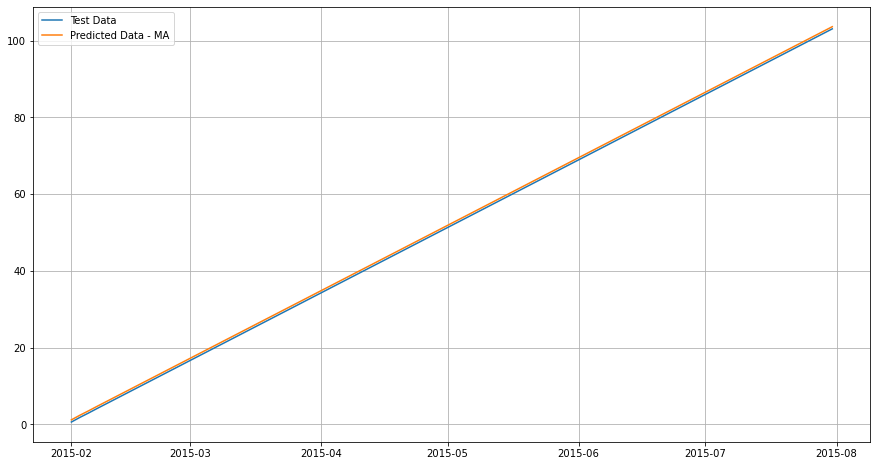

In [439]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - MA')
plt.legend(loc='best')
plt.grid();

In [440]:
from sklearn.metrics import mean_squared_error

In [441]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.5660892868814936

In [442]:
def MAPE(y_true, y_predict):
    return np.mean((np.abs(y_true-y_predict))/(y_true))*100

In [443]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

3.1229019483391376

In [444]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.188351
2015-02-02    0.172476
2015-02-03    0.068658
2015-02-04    0.098573
2015-02-05    0.094620
                ...   
2015-07-27    0.064557
2015-07-28   -0.022155
2015-07-29   -0.039097
2015-07-30   -0.016390
2015-07-31    0.106795
Length: 181, dtype: float64

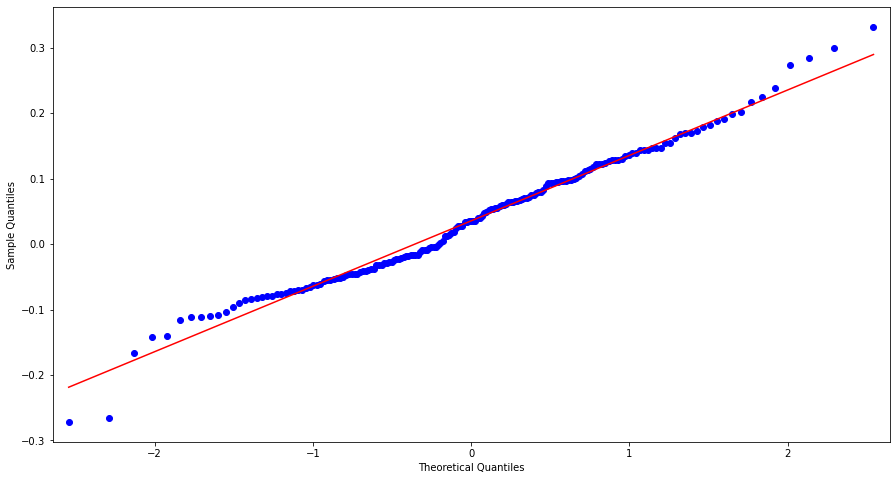

In [445]:
qqplot(residuals, line='s');

In [446]:
# acf- 1,2,3,4      (3 or 4)
# pacf- 1,2,3,5     (5 or 3)
# (3,3) or (3,5) or (4,3) or (4,5)

***ARMA Model***

In [453]:
model=ARMA(train,(5,4))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(5, 4)   Log Likelihood                 834.958
Method:                       css-mle   S.D. of innovations              0.080
Date:                Mon, 21 Mar 2022   AIC                          -1647.916
Time:                        23:10:42   BIC                          -1596.935
Sample:                    01-01-2013   HQIC                         -1628.285
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5650      0.018     30.607      0.000       0.529       0.601
ar.L1.Sales     0.8042      0.001   1162.596      0.000       0.803       0.806
ar.L2.Sales    -0.3663      0.001   -540.139    

In [454]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [455]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [456]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [457]:
len(test)

181

In [458]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

In [459]:
predictions

2015-02-01    0.588949
2015-02-02    0.630906
2015-02-03    0.591168
2015-02-04    0.546353
2015-02-05    0.601249
                ...   
2015-07-27    0.607281
2015-07-28    0.569464
2015-07-29    0.528881
2015-07-30    0.584686
2015-07-31    0.600384
Freq: D, Length: 181, dtype: float64

In [460]:
pred=predictions.cumsum()
pred

2015-02-01      0.588949
2015-02-02      1.219855
2015-02-03      1.811023
2015-02-04      2.357377
2015-02-05      2.958625
                 ...    
2015-07-27    101.374982
2015-07-28    101.944446
2015-07-29    102.473327
2015-07-30    103.058013
2015-07-31    103.658397
Freq: D, Length: 181, dtype: float64

In [461]:
Arma_pred=pd.DataFrame(pred, columns=train.columns)
Arma_pred

,Sales
2015-02-01,0.588949
2015-02-02,1.219855
2015-02-03,1.811023
2015-02-04,2.357377
2015-02-05,2.958625
...,...
2015-07-27,101.374982
2015-07-28,101.944446
2015-07-29,102.473327
2015-07-30,103.058013


In [462]:
pred_str=Arma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [463]:
len(pred_str)

181

In [464]:
pred_str

,Sales,Sales_forecast
2015-02-01,0.588949,1.155038
2015-02-02,1.219855,1.785945
2015-02-03,1.811023,2.377113
2015-02-04,2.357377,2.923466
2015-02-05,2.958625,3.524714
...,...,...
2015-07-27,101.374982,101.941072
2015-07-28,101.944446,102.510535
2015-07-29,102.473327,103.039416
2015-07-30,103.058013,103.624102


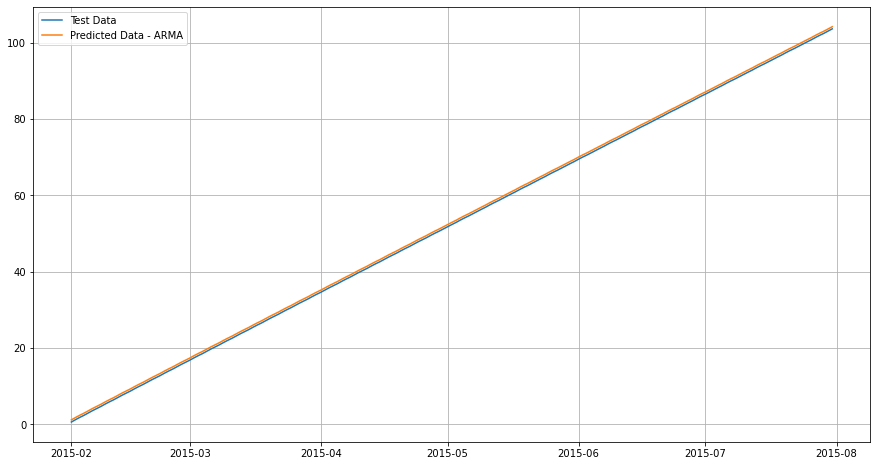

In [465]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - ARMA')
plt.legend(loc='best')
plt.grid();

In [466]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.5660892868814936

In [467]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

3.081622070314995

In [468]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.183154
2015-02-02    0.153844
2015-02-03    0.065574
2015-02-04    0.101212
2015-02-05    0.061023
                ...   
2015-07-27    0.026225
2015-07-28   -0.022670
2015-07-29    0.000971
2015-07-30   -0.032127
2015-07-31    0.075360
Length: 181, dtype: float64

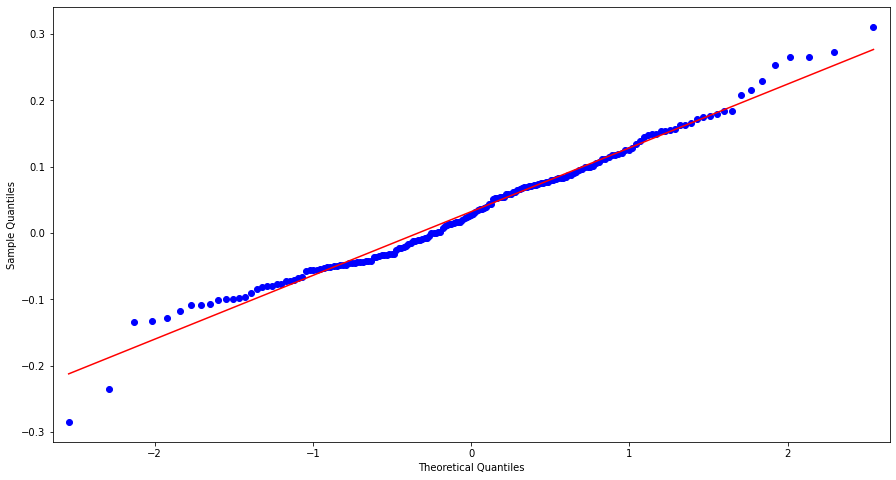

In [469]:
qqplot(residuals, line='s');

In [470]:
final_pred=model_fit.forecast(260)

In [471]:
fv=final_pred[0]
fv

array([0.58894919, 0.63090616, 0.59116814, 0.54635305, 0.60124858,
       0.61348826, 0.54937037, 0.56187013, 0.61810393, 0.57864349,
       0.53859652, 0.5947774 , 0.60900781, 0.5458321 , 0.55916604,
       0.61596049, 0.57698218, 0.53719063, 0.5935663 , 0.6080054 ,
       0.54495137, 0.55831563, 0.61519111, 0.57630419, 0.53650807,
       0.59288157, 0.60739214, 0.54435898, 0.5576819 , 0.6145863 ,
       0.57575347, 0.5359258 , 0.59227763, 0.60684558, 0.54382314,
       0.55709732, 0.61402521, 0.57524255, 0.53538047, 0.59170846,
       0.60633216, 0.54331926, 0.55654377, 0.61349435, 0.5747613 ,
       0.53486435, 0.59116805, 0.60584712, 0.5428435 , 0.55601804,
       0.61299102, 0.57430734, 0.53437533, 0.59065447, 0.60538867,
       0.54239416, 0.55551852, 0.61251364, 0.57387916, 0.53391192,
       0.59016626, 0.60495537, 0.54196983, 0.55504381, 0.61206084,
       0.57347538, 0.53347276, 0.58970208, 0.60454591, 0.54156918,
       0.5545926 , 0.61163131, 0.57309472, 0.53305658, 0.58926

In [472]:
len(fv)

260

In [473]:
ff=pd.DataFrame(fv, columns=['Forecast'])

In [474]:
ff

,Forecast
0,0.588949
1,0.630906
2,0.591168
3,0.546353
4,0.601249
...,...
255,0.527368
256,0.582863
257,0.599133
258,0.536368


In [475]:
date = pd.date_range(start='2015/02/01', periods=260, freq='D')
date

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [476]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [477]:
ff=ff.set_index('Time_Stamp')

In [478]:
ff

,Forecast
Time_Stamp,
2015-02-01,0.588949
2015-02-02,0.630906
2015-02-03,0.591168
2015-02-04,0.546353
2015-02-05,0.601249
...,...
2015-10-14,0.527368
2015-10-15,0.582863
2015-10-16,0.599133


In [479]:
final_value=scaler.inverse_transform(ff[['Forecast']])
final_value

array([[15149.59299646],
       [15862.81484653],
       [15187.31256877],
       [14425.50597928],
       [15358.66898175],
       [15566.72987756],
       [14476.79704185],
       [14689.27898315],
       [15645.19113344],
       [14974.40756723],
       [14293.65351779],
       [15248.6660649 ],
       [15490.56723487],
       [14416.65033499],
       [14643.31249025],
       [15608.75498317],
       [14946.16708149],
       [14269.75497405],
       [15228.07865552],
       [15473.5273827 ],
       [14401.67893091],
       [14628.85654715],
       [15595.67647873],
       [14934.64203506],
       [14258.15217088],
       [15216.4389764 ],
       [15463.10266489],
       [14391.60886688],
       [14618.08377336],
       [15585.39528323],
       [14925.28031782],
       [14248.25417384],
       [15206.17278816],
       [15453.81175663],
       [14382.50023407],
       [14608.14663827],
       [15575.85741333],
       [14916.5953255 ],
       [14238.98423829],
       [15196.49749227],


In [480]:
kk=pd.DataFrame(final_value, columns=['Final_forecast'])

In [481]:
kk

,Final_forecast
0,15149.592996
1,15862.814847
2,15187.312569
3,14425.505979
4,15358.668982
...,...
255,14102.780370
256,15046.139862
257,15322.709791
258,14255.778031


In [482]:
kk['Time_Stamp'] = pd.DataFrame(date)

In [483]:
kk=kk.set_index('Time_Stamp')

In [484]:
kk

,Final_forecast
Time_Stamp,
2015-02-01,15149.592996
2015-02-02,15862.814847
2015-02-03,15187.312569
2015-02-04,14425.505979
2015-02-05,15358.668982
...,...
2015-10-14,14102.780370
2015-10-15,15046.139862
2015-10-16,15322.709791


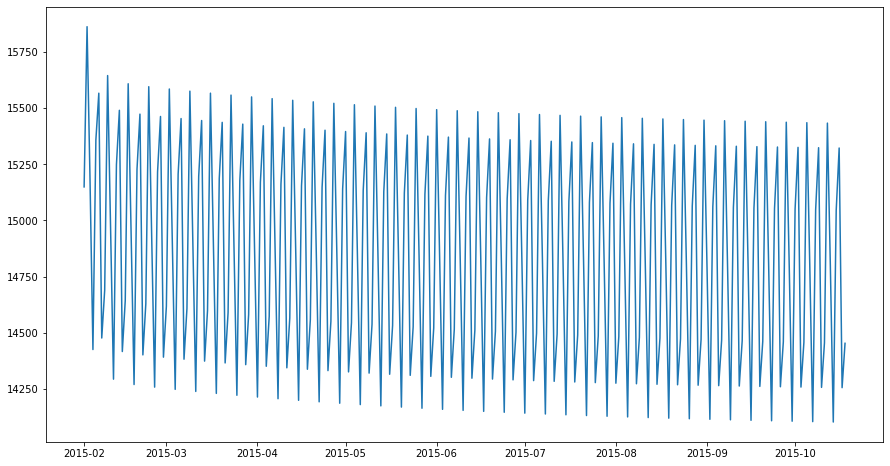

In [485]:
plt.plot(kk)

Text(0.5, 0, 'Days')

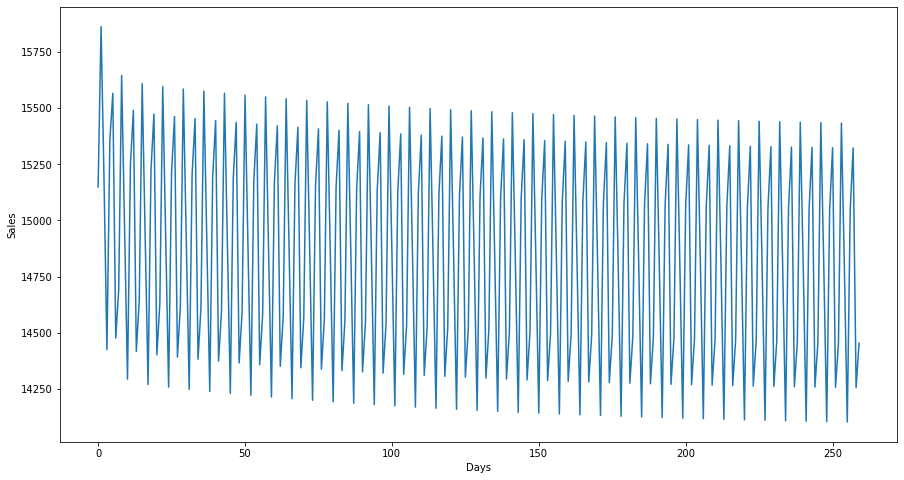

In [486]:
x=list(range(len(kk.Final_forecast.index)))
y=kk.Final_forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

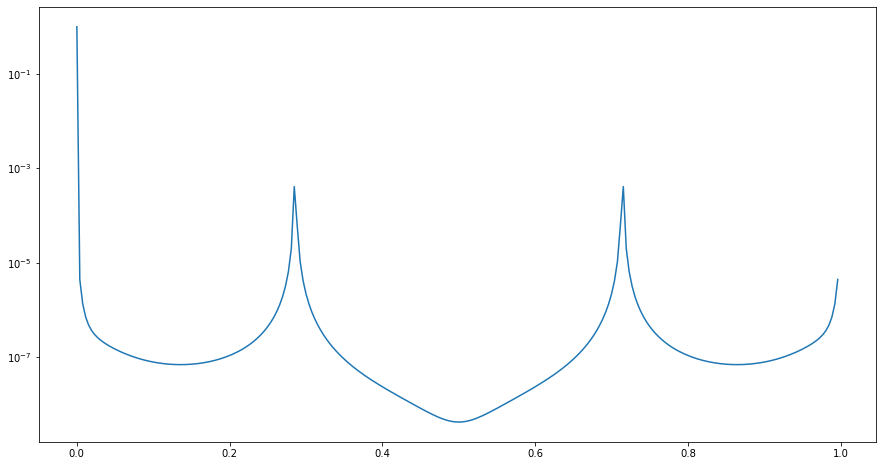

In [487]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

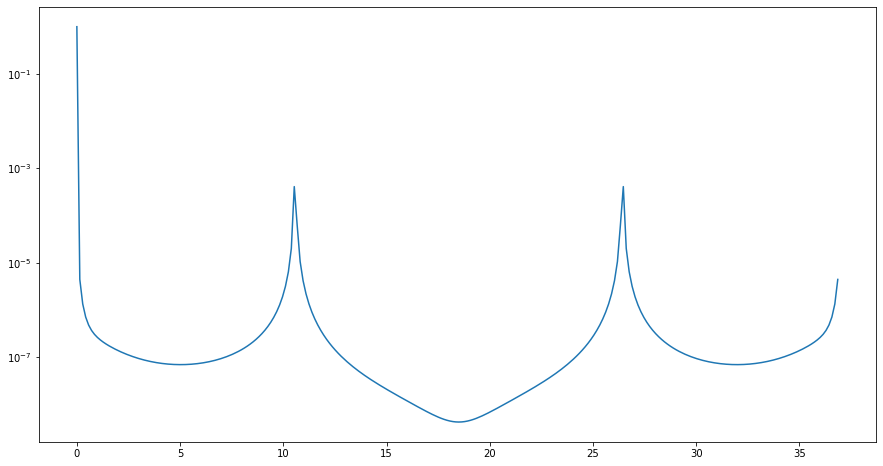

In [488]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

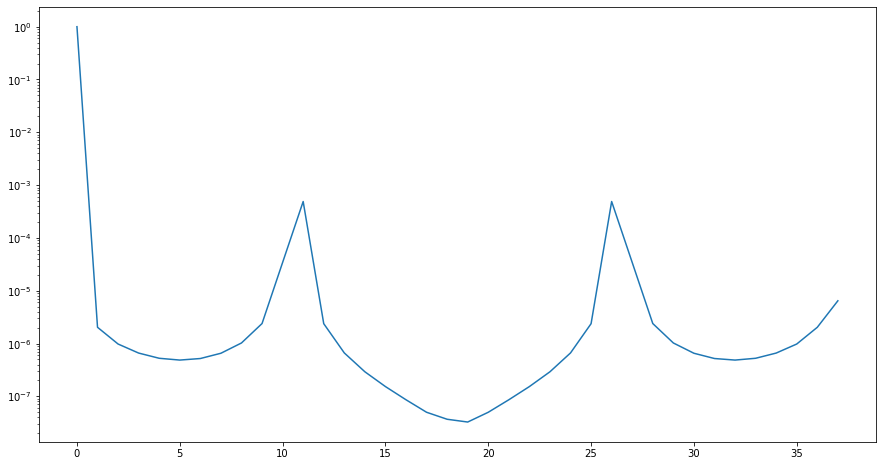

In [489]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

***SARIMA Model***

In [490]:
import itertools
p = q = range(0, 6)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(0, 0, 4, 7)


In [491]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [492]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:1330.6999207274803
SARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:648.9432951055599
SARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:135.54203269992973
SARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:-85.23874934327685
SARIMA(0, 0, 0)x(0, 0, 4, 7)12 - AIC:-298.2345327785024
SARIMA(0, 0, 0)x(0, 0, 5, 7)12 - AIC:-406.62678403159805
SARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:-856.9143315811826
SARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:-1296.695798165777
SARIMA(0, 0, 0)x(1, 0, 2, 7)12 - AIC:-1287.4407228483187
SARIMA(0, 0, 0)x(1, 0, 3, 7)12 - AIC:-1302.1573942306022
SARIMA(0, 0, 0)x(1, 0, 4, 7)12 - AIC:-1284.428023532755
SARIMA(0, 0, 0)x(1, 0, 5, 7)12 - AIC:-1272.581591712154
SARIMA(0, 0, 0)x(2, 0, 0, 7)12 - AIC:-1153.920770373169
SARIMA(0, 0, 0)x(2, 0, 1, 7)12 - AIC:-1289.9839556568506
SARIMA(0, 0, 0)x(2, 0, 2, 7)12 - AIC:-1289.3676022610348
SARIMA(0, 0, 0)x(2, 0, 3, 7)12 - AIC:-1311.4331690073113
SARIMA(0, 0, 0)x(2, 0, 4, 7)12 - AIC:-1293.9699178810297
SARIMA(0, 0, 0)x(2, 0, 5, 7)12 - AIC:-1278

In [493]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
439,"(2, 0, 0)","(1, 0, 1, 7)",-1721.204141
187,"(0, 0, 5)","(1, 0, 1, 7)",-1721.061713
727,"(3, 0, 2)","(1, 0, 1, 7)",-1721.003424
259,"(1, 0, 1)","(1, 0, 1, 7)",-1720.167819
475,"(2, 0, 1)","(1, 0, 1, 7)",-1719.819025
...,...,...,...
37,"(0, 0, 1)","(0, 0, 1, 7)",4.706631
2,"(0, 0, 0)","(0, 0, 2, 7)",135.542033
36,"(0, 0, 1)","(0, 0, 0, 7)",472.322376
1,"(0, 0, 0)","(0, 0, 1, 7)",648.943295


In [494]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(2,0,0),
                                seasonal_order=(1,0,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  761
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 7)   Log Likelihood                 865.602
Date:                             Tue, 22 Mar 2022   AIC                          -1721.204
Time:                                     13:06:37   BIC                          -1698.090
Sample:                                 01-01-2013   HQIC                         -1712.299
                                      - 01-31-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5908      0.027     22.068      0.000       0.538       0.643
ar.L2          0.0997      

In [495]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

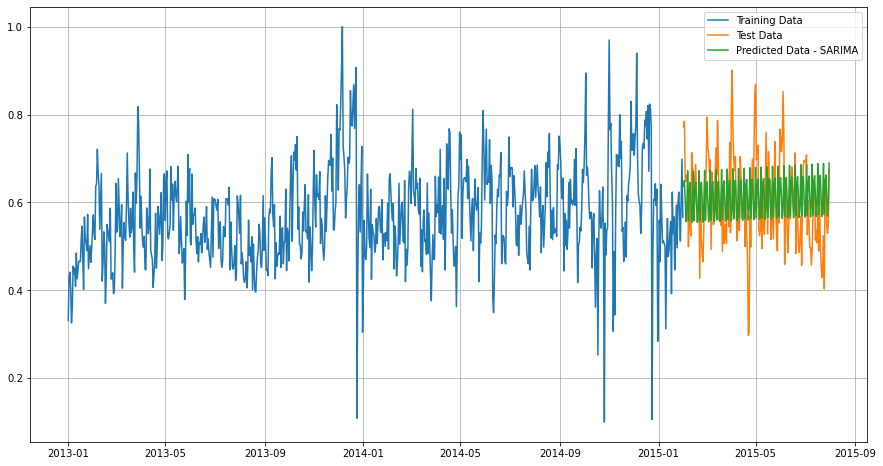

In [496]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

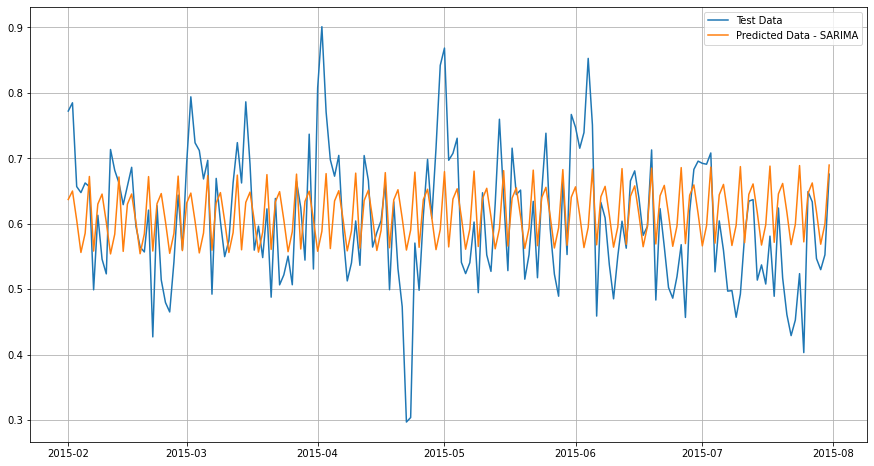

In [497]:
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [498]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sales'],SARIMA_predictions, squared=False)
print(rmse)

0.09440011424380393


In [499]:
mape = MAPE(test['Sales'],SARIMA_predictions)
print(mape)

12.917947994489667


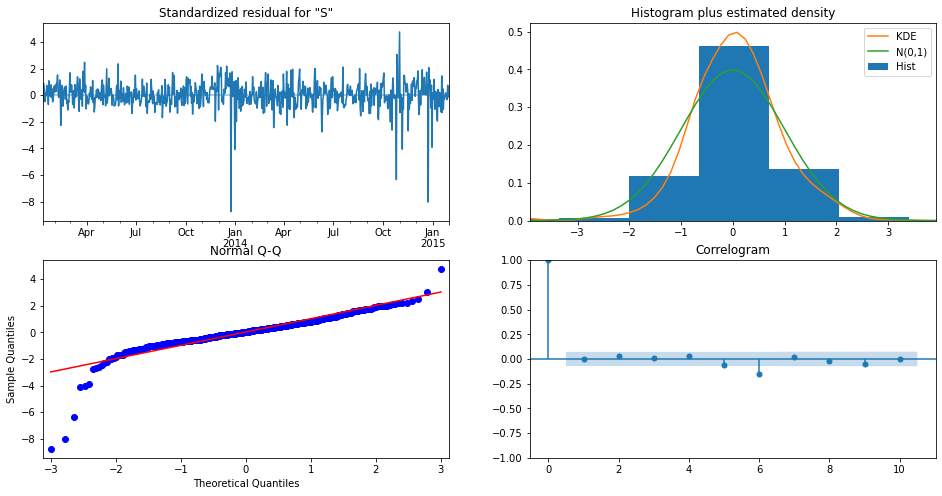

In [500]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [501]:
final_pred4=model_Sarima.forecast(260)

In [502]:
fv4=final_pred[0]
fv4

array([0.58894919, 0.63090616, 0.59116814, 0.54635305, 0.60124858,
       0.61348826, 0.54937037, 0.56187013, 0.61810393, 0.57864349,
       0.53859652, 0.5947774 , 0.60900781, 0.5458321 , 0.55916604,
       0.61596049, 0.57698218, 0.53719063, 0.5935663 , 0.6080054 ,
       0.54495137, 0.55831563, 0.61519111, 0.57630419, 0.53650807,
       0.59288157, 0.60739214, 0.54435898, 0.5576819 , 0.6145863 ,
       0.57575347, 0.5359258 , 0.59227763, 0.60684558, 0.54382314,
       0.55709732, 0.61402521, 0.57524255, 0.53538047, 0.59170846,
       0.60633216, 0.54331926, 0.55654377, 0.61349435, 0.5747613 ,
       0.53486435, 0.59116805, 0.60584712, 0.5428435 , 0.55601804,
       0.61299102, 0.57430734, 0.53437533, 0.59065447, 0.60538867,
       0.54239416, 0.55551852, 0.61251364, 0.57387916, 0.53391192,
       0.59016626, 0.60495537, 0.54196983, 0.55504381, 0.61206084,
       0.57347538, 0.53347276, 0.58970208, 0.60454591, 0.54156918,
       0.5545926 , 0.61163131, 0.57309472, 0.53305658, 0.58926

In [503]:
len(fv4)

260

In [504]:
final_value44=scaler.inverse_transform([fv4])
final_value44

array([[15149.59299646, 15862.81484653, 15187.31256877, 14425.50597928,
        15358.66898175, 15566.72987756, 14476.79704185, 14689.27898315,
        15645.19113344, 14974.40756723, 14293.65351779, 15248.6660649 ,
        15490.56723487, 14416.65033499, 14643.31249025, 15608.75498317,
        14946.16708149, 14269.75497405, 15228.07865552, 15473.5273827 ,
        14401.67893091, 14628.85654715, 15595.67647873, 14934.64203506,
        14258.15217088, 15216.4389764 , 15463.10266489, 14391.60886688,
        14618.08377336, 15585.39528323, 14925.28031782, 14248.25417384,
        15206.17278816, 15453.81175663, 14382.50023407, 14608.14663827,
        15575.85741333, 14916.5953255 , 14238.98423829, 15196.49749227,
        15445.08407106, 14373.93485943, 14598.73674674, 15566.83346881,
        14908.41455865, 14230.210849  , 15187.31111744, 15436.83894439,
        14365.84746464, 14589.79994481, 15558.27735334, 14900.6977719 ,
        14221.89802515, 15178.58080503, 15429.04581691, 14358.20

In [505]:
date4 = pd.date_range(start='2015/02/01', periods=260, freq='D')
date4

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [506]:
ff44=pd.DataFrame(final_value44.reshape(-1,1), columns=['Forecast'])

In [507]:
ff44

,Forecast
0,15149.592996
1,15862.814847
2,15187.312569
3,14425.505979
4,15358.668982
...,...
255,14102.780370
256,15046.139862
257,15322.709791
258,14255.778031


In [508]:
ff44['Time_stamp']= date4

In [509]:
ff44

,Forecast,Time_stamp
0,15149.592996,2015-02-01
1,15862.814847,2015-02-02
2,15187.312569,2015-02-03
3,14425.505979,2015-02-04
4,15358.668982,2015-02-05
...,...,...
255,14102.780370,2015-10-14
256,15046.139862,2015-10-15
257,15322.709791,2015-10-16
258,14255.778031,2015-10-17


In [510]:
ff44=ff44.set_index('Time_stamp')

In [511]:
ff44

,Forecast
Time_stamp,
2015-02-01,15149.592996
2015-02-02,15862.814847
2015-02-03,15187.312569
2015-02-04,14425.505979
2015-02-05,15358.668982
...,...
2015-10-14,14102.780370
2015-10-15,15046.139862
2015-10-16,15322.709791


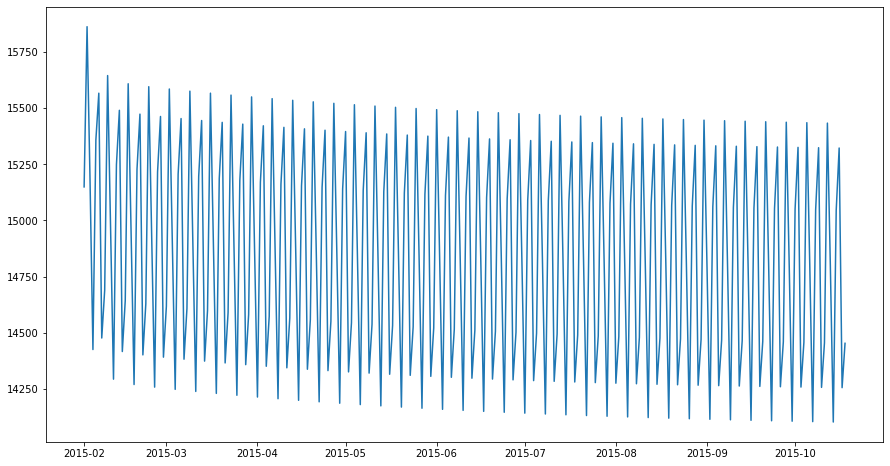

In [512]:
plt.plot(ff44)

Text(0.5, 0, 'Days')

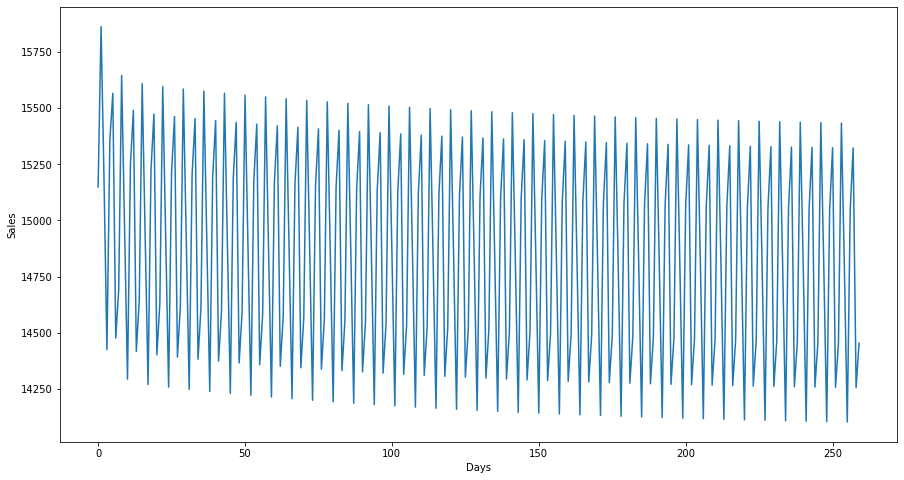

In [513]:
x=list(range(len(ff44.Forecast.index)))
y=ff44.Forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

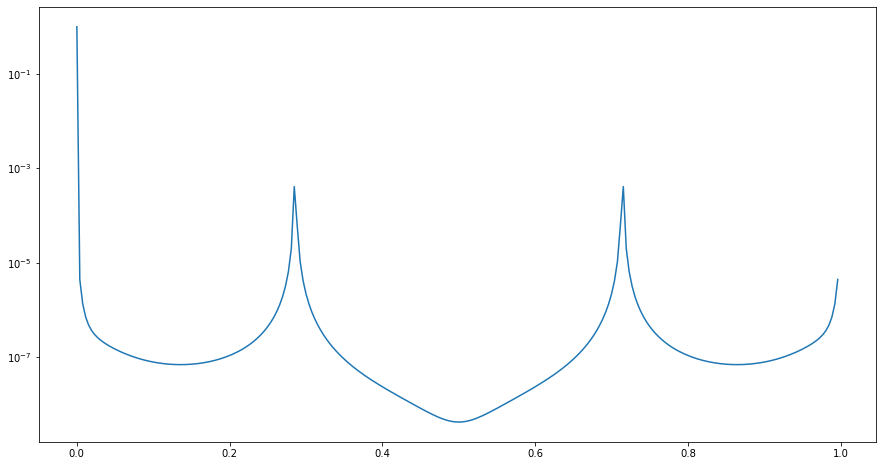

In [514]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

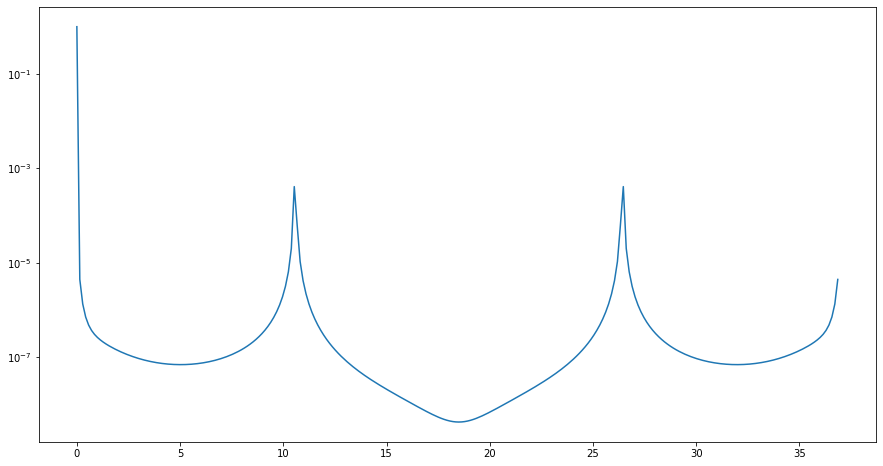

In [515]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

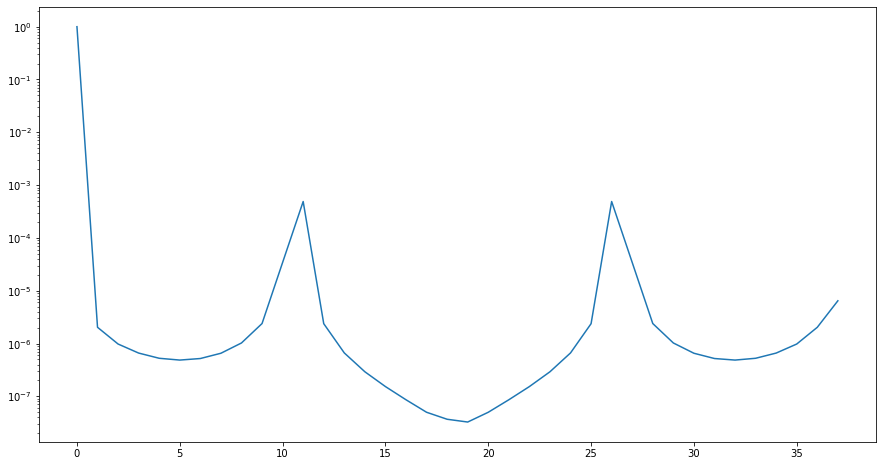

In [516]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)